## Исследовательский анализ данных сервиса Яндекс Афиша

- Автор: Тюлюпов Глеб
- Дата: 17.07.2025

## Цели и задачи проекта

**Цель:** исследовательский анализ данных в Python на основе данных сервиса 'Яндекс Афиша' с целью изучения изменения пользовательских предпочтений и популярности событий осенью 2024 года, а также проверки гипотез о разнице в поведении пользователей с мобильных и стационарных устройств..   

**Задачи:**
1. Знакомство с данными: загрузка и первичная предобработка, в том числе:
     - загрузка необходимых библиотек;
     - вывод общей информации и общее знакомство с данными.
     
     
2. Предобработка данных и подготовка их к исследованию в том числе:
     - проверка данных на пропуски и дубликаты;
     - изучение значения в ключевых категориальных и количественных столбцах;
     - проверка данных на явные и неявные дубликаты;
     - преобразование типов данных;
     - создание новых столбцов.
     
     
3. Исследовательский анализ данных, в том числе:
    - анализ распределения заказов по сегментам и их сезонных изменений;
    - анализ осенней активности пользователей;
    - выявление популярных событий и партнёров.
        
    
4. Статистический анализ данных, в том числе:
    - проверка гипотезы о среднем количестве заказов  пользователей разных устройств;
    - проверка гипотезы о среднем количестве дней между заказами у пользователей разных устройств.

5. Составление общих выводов и рекомендаций.

## Содержимое проекта

 Проект включает в себя следующие основные этапы:
   1. Знакомство с данными: загрузка и первичная предобработка.
   2. Предобработка данных и подготовка их к исследованию.
   3. Исследовательский анализ данных.
   4. Статистический анализ данных.
   5. Составление общих выводов и рекомендаций.

## 1. Загрузка данных и знакомство с ними

На самом первом этапе загрузим данные и изучим первую информацию о них. Оценим объём данных, их корректность и соответствие описанию, а также рассмотрим, какие шаги необходимо сделать на стадии предобработки данных.

На самом первом шаге импортируем все необходимые библиотеки и функции.

In [1]:
# Импортируем биоблиотеку pandas
import pandas as pd

# Импортируем библиотеку matplotlib.pyplot для визуализации данных
import matplotlib.pyplot as plt

# Импортируем библиотеку numpy для математических расчётов
import numpy as np

# Импортируем функцию ttest_ind из модуля scipy.stats
from scipy.stats import ttest_ind

# Импортируем из модуля sstatsmodels.stats.proportion функцию proportion_effectsize
from statsmodels.stats.proportion import proportion_effectsize

# Импортируем из модуля statsmodels.stats.power функцию NormalIndPower
from statsmodels.stats.power import NormalIndPower

# Импортируем из модуля statsmodels.stats.proportion функцию proportions_ztest
from statsmodels.stats.proportion import proportions_ztest

Далее создадим датафрейм с  информацией обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных, загрузив файл final_tickets_orders_df.csv, а также выведем несколько строк полученного датафрейма.

In [2]:
# Создам датафрейм orders_df, содержащий информацию CSV-файла final_tickets_orders_df.csv
orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')

orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


Выведем общую информацию о датафрйеме `orders_df` методом `info()`.

In [3]:
# Выведем общую информацию о датафрейме orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Как видно из выгрузки датафрейм содержит 14 столбцов и 290849 строк. Пропуски присутствуют только в столбце `days_since_prev`.

На первый взгляд названия столбцов корректно отражают информацию, содержащуюся в них.

Столбцы `order_id`, `event_id`, `tickets_count`, `age_limit` содержат информацию в формате `int64`, что является для них оптимальных, однако для них можно оптимизировать разрядность с помощью метода `to_numeric`.

Данные в столбцах `revenue`, `total`, `days_since_prev` содержатся в формате `float64`. Для столбцов `revenue` и `total` такой формат является оптимальным, однако для также можно оптимизировать разрядность методом `to_numeric`. Предварительно проверив уникальные значения в столбце `days_since_prev` и, в случае отсутствии в нём записей с цифрами после точки, столбец можно привести к формату `integer` методом `to_numeric` с оптимальной разрядностью.

Данные содержатся в формате `object` в столбцах `user_id`, `created_dt_msk`, `created_ts_msk`, `cinema_circuit`,  `currency_code`, `device_type_canonical`, `service_name`. Для столбцов `user_id`, `cinema_circuit`, `currency_code`, `device_type_canonical`, `service_name` данный формат является подходящим, в то время как данные в столбцах `created_dt_msk` и `created_ts_msk` лучше привести к формату `datetime`, т.к. данные столбцы содержат информацию о дате и времени.

Далее создадим датафрейм  `events_df`, который будет содержать информацию из датасета `final_tickets_events_df.csv`, в котором хранятся данные о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия
Аналогичным образом проведём первичный анализ данных.

In [4]:
# Создам датафрейм events_df, содержащий информацию CSV-файла final_tickets_events_df.csv
events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')

events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


Далее выведем общую информацию о датафрейме методом `info()`.

In [5]:
# Выведем общую информацию о датафрейме events_df методом `info()`
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Как видно из выгрузки, датафрейм содержит 22427 строк и 11 столбцов.

Как и в случае с предыдущим датафреймом, названия столбцов корректно отражают информацию, содержащуюся в них.

Столбцы `event_id`, `city_id`, `venue_id` содержат информацию в формате `int64`, являющийся для для данных столбцов оптимальным форматом. Однако при этом стоит рассмотреть возможность оптимизировать разрядность методом `to_numeric`.

Все остальные столбцы, в том числе `event_name`, `event_type_description`, `event_type_main`, `organizers`, `region_name`, `city_name`, `venue_name`, `venue_address`, содержат информацию в формате `object`, что является для всех столбцов подходящим форматом.

### Промежуточный вывод

Таким образом, в данном разделе была проведена загрузка необходимых библиотек и функций для дальнейшей работы.

Были загружены необходимые данные из файлов `final_tickets_orders_df.csv` и  `final_tickets_events_df.csv` в датафреймы `orders_df` и `events_df`. Также было проведено первичное знакомство с данными, в ходе которого было установлено:

   - названия столбцов корректно отражают содержащуюся в них информацию;
   - в датафрейме отсутствуют пропуски, исключение составляет столбец `days_since_prev` датафтрейма, т.к. в данном столбце содержится информация о количестве дней с предыдущего заказа для пользователей, и, соответственно для пользователей, совершивших свой первый заказ, в данном столбце будут присутствовать пропуски;
   - данные в большинстве столбцов содержатся в оптимальных форматах, однако  для столбца `days_since_prev` оптимально было скорректировать формат с `float` на `integer` с оптимальной разрядностью. Также в этом же датафрейме данные в столбцах `created_dt_msk` и `created_ts_msk` лучше привести к формату `datetime`, т.к. в данных столбцах содержится информация о дате и времени заказов. Кроме этого можно оптимизировать разрядность для столбцов `order_id`, `event_id`, `tickets_count`, `age_limit`, `revenue`, `total` датафрейма `orders_df`, а также для столбцов `event_id`, `city_id`, `venue_id` датафрейма `events_df`.

## 2. Предобработка данных и подготовка их к исследованию

### 2.1 Проверка данных на пропуски

На следующем этапе проведём предобработку данных. Для более удобной предобработки объединим оба датафрейма в один и приcвоим ему имя `afisha_df`. Объединение будем осуществлять по общему столбцу `events_id`.

In [6]:
# Объединим датафреймы orders_df и events_df
afisha_df = orders_df.merge(events_df, on ='event_id', how='left')

# Выведем полученный датафрейм
display(afisha_df.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


В самом начале рассмотрим датафреймы на наличие пропусков. Как видно из первой части проекта, пропуски присутствуют только в столбце `days_since_prev`. Выведем общую информацию об обновлённом датафрйеме.

In [7]:
# Выведем общую информацию о обновлённом датафрйеме afisha_df
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

Как видно из выгрузки для столбцов из датафрейма `events_df` образовались пропуски, что связано с отсутствием информации о части мероприятий из таблицы `orders_df`, что в свою очередь может быть связано с удалением информации о мероприятиях категории `фильмы`. 
Для дальнейшего анализа исключим из датафрейма заказы, содержащие пропуски в таблице `events_df`.

In [8]:
# Выведем количество пропусков в относительном значении
len(afisha_df[afisha_df['event_name'].isna()])/len(afisha_df)*100

0.08182940288603364

Количество пропусков составялет менее 0,1%.

In [9]:
# Удалим пропуски по столбце event_name
afisha_df = afisha_df[~afisha_df['event_name'].isna()].reset_index(drop=True)
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

### 2.2 Поиск значений, обозначающих пропуски

Далее изучим значения в ключевых столбцах. Для категориальных значений рассмотрим, какие категории присутствуют в данных и проверим, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. Для начала выведем уникальные значения по столбцам `cinema_circuit`, `ge_limit`, `currency_code`, `device_type_canonical`, `event_type_description`, `event_type_main`, `organizers`.

In [10]:
# Выведем уникальные значения по столбцу cinema_circuit
display(afisha_df['cinema_circuit'].value_counts())

# Выведем уникальные значения по столбцу age_limit
display(afisha_df['age_limit'].value_counts())

# Выведем уникальные значения по столбцу currency_code
display(afisha_df['currency_code'].value_counts())

# Выведем уникальные значения по столбцу device_type_canonical
display(afisha_df['device_type_canonical'].value_counts())

# Выведем уникальные значения по столбцу event_type_description
display(afisha_df['event_type_description'].value_counts())

# Выведем уникальные значения по столбцу 
display(afisha_df['event_type_main'].value_counts())

# Выведем уникальные значения по столбцу 
display(afisha_df['organizers'].value_counts())

нет           289213
Другое          1261
КиноСити         122
Москино            7
Киномакс           7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

16    78556
12    62474
0     61487
6     52161
18    35933
Name: age_limit, dtype: int64

rub    285542
kzt      5069
Name: currency_code, dtype: int64

mobile     232490
desktop     58121
Name: device_type_canonical, dtype: int64

концерт                   112049
событие                    58605
спектакль                  50592
шоу                        13626
спорт                      12837
мюзикл                      9919
спортивное мероприятие      9074
балет                       5998
выставка                    5876
цирковое шоу                5327
фестиваль                   4273
опера                       1314
ёлка                         945
музыкальный спектакль        140
кукольный спектакль           13
экскурсия                      8
оперетта                       7
подарок                        4
снегурочка                     3
рок-мюзикл                     1
Name: event_type_description, dtype: int64

концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
Name: event_type_main, dtype: int64

№1531    9748
№2121    4738
№4054    4362
№4549    3972
№4837    3368
         ... 
№2175       1
№2896       1
№4756       1
№3837       1
№3046       1
Name: organizers, Length: 4293, dtype: int64

Для столбца `cinema_circuit`, в случае неприменимости информации о сети кинотеатров, указывается значение `нет`, в случае отсутствии информации указывается значение `Другое`. 
Для остальных столбцов каких-либо значений, которые могут обозначать пропуски, не обнаружено. 
Далее  отдельно выведем уникальные значения в столбце `region_name`.

In [11]:
# Выведем уникальные значения по столбцу region_name
afisha_df['region_name'].unique()

array(['Каменевский регион', 'Североярская область', 'Озернинский край',
       'Лугоградская область', 'Поленовский край', 'Широковская область',
       'Медовская область', 'Златопольский округ', 'Малиновоярский округ',
       'Яблоневская область', 'Ветренский регион', 'Боровлянский край',
       'Крутоводская область', 'Ягодиновская область',
       'Серебряноярский округ', 'Лесодальний край', 'Верхоречная область',
       'Горицветская область', 'Речиновская область', 'Травиницкий округ',
       'Сосновская область', 'Серебринская область', 'Травяная область',
       'Каменноярский край', 'Солнечноземская область',
       'Светополянский округ', 'Заречная область', 'Ручейковский край',
       'Глиногорская область', 'Тепляковская область',
       'Каменноозёрный край', 'Солнечнореченская область',
       'Зоринский регион', 'Берёзовская область', 'Лесостепной край',
       'Малиновая область', 'Синегорский регион', 'Луговая область',
       'Шанырский регион', 'Каменополянский окр

Как видно из выгрузки, значений отдельно обозначающие пропуски, не обнаружено.
Далее отдельно выгрузим уникальные значения по столбцу `city_name`.

In [12]:
# Выведем уникальные значения по столбцу city_name
afisha_df['city_name'].unique()

array(['Глиногорск', 'Озёрск', 'Родниковецк', 'Кристалевск',
       'Дальнозолотск', 'Радужнополье', 'Радужсвет', 'Кумсай',
       'Верховино', 'Светополье', 'Кокжар', 'Каменский', 'Лесоярич',
       'Никольянов', 'Речинцево', 'Лесозолотск', 'Дальнозерск',
       'Серебрянка', 'Островецк', 'Родниковец', 'Дальнесветск',
       'Луговаярово', 'Ягодиновка', 'Дальнополин', 'Солчелуг', 'Озёрчане',
       'Серебровино', 'Лесоярово', 'Глинополье', 'Глиноград',
       'Дальнесветин', 'Северополье', 'Теплоозеро', 'Горнодолинск',
       'Ордакент', 'Озёрово', 'Луговинск', 'Лугоград', 'Златопольск',
       'Крутовинск', 'Сарыжар', 'Сосновечин', 'Тихоярск', 'Яблонецк',
       'Жаркентай', 'Широковка', 'Синеводов', 'Синеводск', 'Тихосветск',
       'Радужанов', 'Глиногорь', 'Каменосветск', 'Родниковск',
       'Травогород', 'Глинянск', 'Радужинск', 'Поляногорье',
       'Дальнолесье', 'Ручейник', 'Ключеград', 'Ключеводск', 'Поленовино',
       'Речичанск', 'Ключевополье', 'Шаныртау', 'Дальнесоснов'

Как  и в случае с названиями регионов, значений отдельно обозначающие пропуски, не обнаружено.

### 2.3 Анализ распределения и выбросов данных  

#### 2.3.1 Количество купленных билетов (tickets_count)

Далее для количественных значений рассмотрим распределение и наличие выбросов. Рассмотрим наличие выбросов для столбцов `tickets_count`, `revenue`, `total`.
Для начала выведем уникальные значения и статистические показатели по столбцу `tickets_count` с количеством билетов в одном заказе.

In [13]:
# Выведем уникальные значения по столбцу tickets_count
display(afisha_df['tickets_count'].value_counts())

# Выведем статистические показатели по столбцу tickets_count
display(afisha_df['tickets_count'].describe())

3     92247
2     83807
4     54812
1     41798
5     13476
6      4283
7        62
9        38
8        21
10       19
11       13
13        7
17        6
19        5
12        4
14        4
15        2
27        2
30        2
37        1
47        1
57        1
Name: tickets_count, dtype: int64

count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

Как видно из выгрузки, чаще всего встречаются заказы с тремя, двумя, четырьмя заказами. Заказы с количеством равному `7 и более` значительно ниже количества заказов с 6 билетами. Статистические показатели признака показывают, что медианное значение составляет 3, в то время как среднее значение 2,75. Построим для данного столбца гистограмму распределения и диаграмму размаха. 

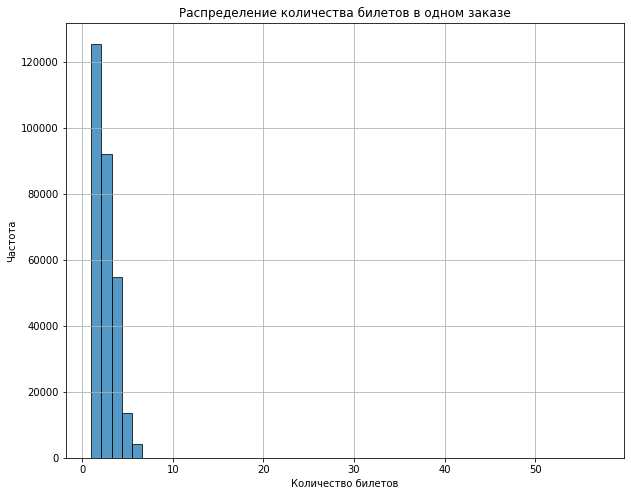

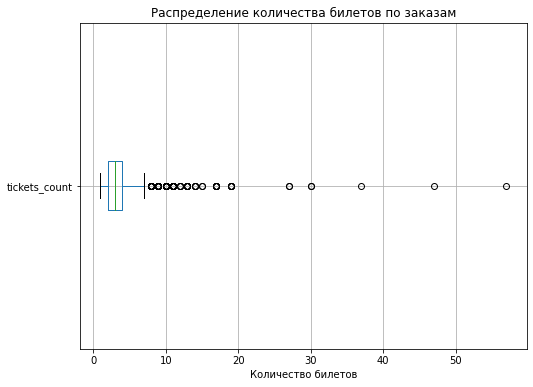

In [14]:
plt.figure(figsize=(10, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
afisha_df['tickets_count'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение количества билетов в одном заказе')
plt.xlabel('Количество билетов')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

boxplot = afisha_df.boxplot(column='tickets_count',
                     vert=False, 
                     figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение количества билетов по заказам')
boxplot.set_xlabel('Количество билетов')

plt.show()

Из диаграммы размаха видно, что медианное значение составляет около 3, а также, что значения выше 6 билетов в одном заказе можно отнести к выбросам.

#### 2.3.2 Общая сумма заказа (total)

Далее аналогичным образом рассмотрим значения по столбцу `total`. Т.к. заказы осуществлялись отдельно в рублях и в тенге, выведем показатели и графики для заказов в разных валютах отдельно. Для начала, выведем статистические показателя для рублёвых заказов.

In [15]:
# Выведем статистические показатели по столбцу total для заказов, сделанных в рублях
afisha_df[afisha_df['currency_code']=='rub']['total'].describe()

count    285542.000000
mean       6330.621221
std        8619.327495
min        -358.850000
25%        2120.070000
50%        4673.850000
75%        8783.220000
max      811745.400000
Name: total, dtype: float64

Из выгрузки видно, что среднее значение составляет 6330,62, в то время как медиана равна 4673.

Построим гистограмму распределения и диаграмму размаха.

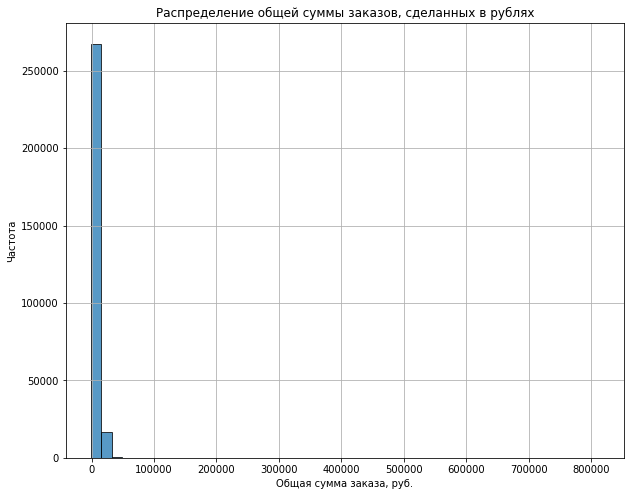

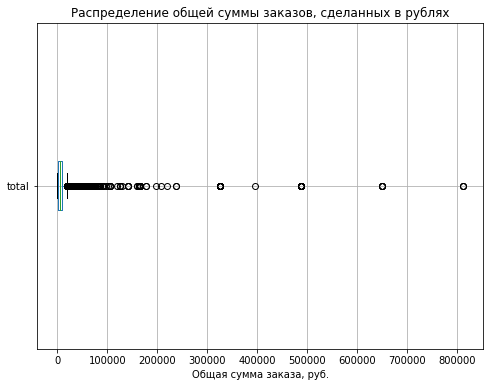

In [16]:
plt.figure(figsize=(10, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
afisha_df[afisha_df['currency_code']=='rub']['total'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение общей суммы заказов, сделанных в рублях')
plt.xlabel('Общая сумма заказа, руб.')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

boxplot = afisha_df[afisha_df['currency_code']=='rub'].boxplot(column='total',
                     vert=False, 
                     figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение общей суммы заказов, сделанных в рублях')
boxplot.set_xlabel('Общая сумма заказа, руб.')

plt.show()

Из диаграммы размаха видно, что имеются заказы, для которых значения общий суммы превышает примерно `10 000`, можно отнести к выбросам.

Проведём аналогичные действия для заказов, осуществлённых в тенге.

In [17]:
# Выведем статистические показатели по столбцу total для заказов, сделанных в тенге
afisha_df[afisha_df['currency_code']=='kzt']['total'].describe()

count      5069.000000
mean      75236.969067
std       68039.218885
min           0.000000
25%        9353.700000
50%       61647.160000
75%      114868.830000
max      344606.500000
Name: total, dtype: float64

Как видно из выгрузки среднее значение показателя составляет `75 236,96`, в то время как медиана - `61 647,16`.

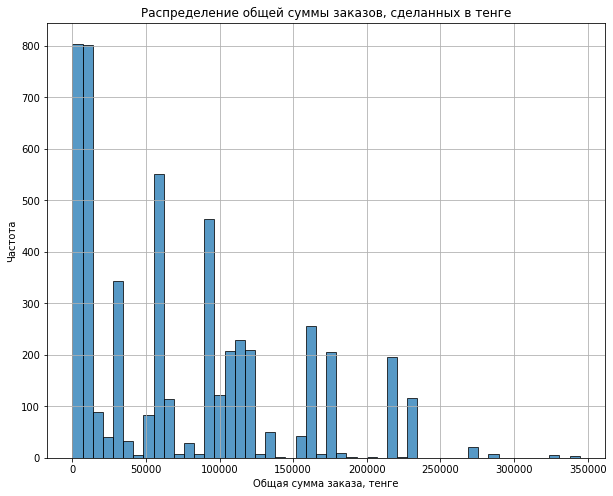

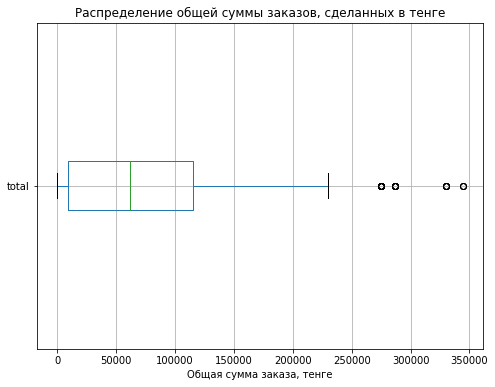

In [18]:
plt.figure(figsize=(10, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
afisha_df[afisha_df['currency_code']=='kzt']['total'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение общей суммы заказов, сделанных в тенге')
plt.xlabel('Общая сумма заказа, тенге')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

boxplot = afisha_df[afisha_df['currency_code']=='kzt'].boxplot(column='total',
                     vert=False, 
                     figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение общей суммы заказов, сделанных в тенге')
boxplot.set_xlabel('Общая сумма заказа, тенге')

plt.show()

Как видно из гистограммы распределения общая сумма для заказов, сделанных в тенге, распределена крайне неравномерно. Диаграмма распределения показывает, что заказы, общая сумма которых составляет более `270 000` тенге, можно отнести к выбросам.

#### 2.3.3 Выручка от заказа (revenue)

Далее аналогичным образом рассмотрим значения по столбцу `revenue`. Т.к. заказы осуществлялись также отдельно в рублях и в тенге, выведем показатели и графики для заказов в разных валютах отдельно.

In [19]:
# Выведем статистические показатели по столбцу revenue
afisha_df[afisha_df['currency_code']=='rub']['revenue'].describe()

count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

Средняя выручка для рублёвых заказов составляет `548,01`, в то время как медиана `346,63`.

Выведем диаграмму размаха и гистограмму распределения показателя.

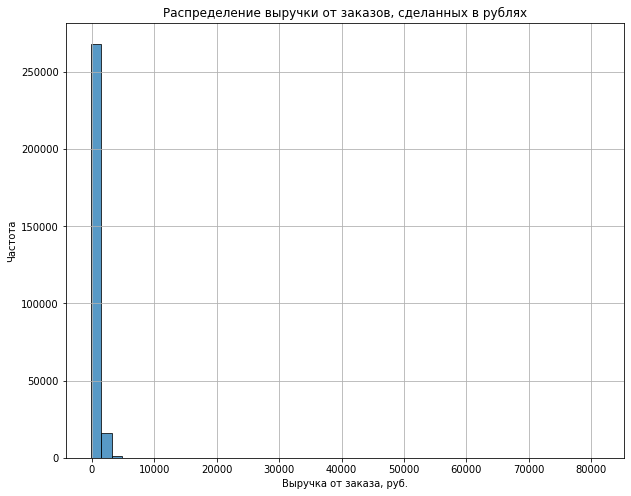

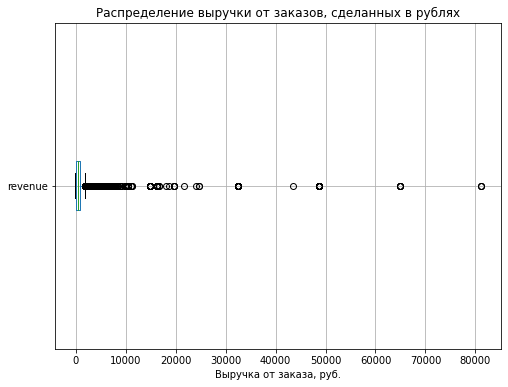

In [20]:
plt.figure(figsize=(10, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
afisha_df[afisha_df['currency_code']=='rub']['revenue'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение выручки от заказов, сделанных в рублях')
plt.xlabel('Выручка от заказа, руб.')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

boxplot = afisha_df[afisha_df['currency_code']=='rub'].boxplot(column='revenue',
                     vert=False, 
                     figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение выручки от заказов, сделанных в рублях')
boxplot.set_xlabel('Выручка от заказа, руб.')

plt.show()

Как видно из диаграммы распределения, заказы, выручка от которых приблизительно превышает `2000-2500` рублей можно отнести к выбросам. Для дальнейшего анализа отберём значения по 99-му процентилю.

In [21]:
# Отберём заказы, сделанные в рублях по 99-му процентилю по выручке
border = afisha_df[afisha_df['currency_code'] == 'rub']['revenue'].quantile(0.99)
afisha_df[afisha_df['currency_code']=='rub'] = afisha_df[(afisha_df['currency_code'] == 'rub') & (afisha_df['revenue'] < border)]

# Выведем информацию об обновлённом датафрейме
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287754 non-null  float64
 1   user_id                 287754 non-null  object 
 2   created_dt_msk          287754 non-null  object 
 3   created_ts_msk          287754 non-null  object 
 4   event_id                287754 non-null  float64
 5   cinema_circuit          287754 non-null  object 
 6   age_limit               287754 non-null  float64
 7   currency_code           287754 non-null  object 
 8   device_type_canonical   287754 non-null  object 
 9   revenue                 287754 non-null  float64
 10  service_name            287754 non-null  object 
 11  tickets_count           287754 non-null  float64
 12  total                   287754 non-null  float64
 13  days_since_prev         266041 non-null  float64
 14  event_name          

После удаления значений по 99-ому процентилю, образовались пустые строки. Удалим с помощью метода `dropna`.

In [22]:
# Удалим пустые строки
afisha_df.dropna(how='all', inplace=True)

# Выведем информацию об обновлённом датафрейме
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287754 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287754 non-null  float64
 1   user_id                 287754 non-null  object 
 2   created_dt_msk          287754 non-null  object 
 3   created_ts_msk          287754 non-null  object 
 4   event_id                287754 non-null  float64
 5   cinema_circuit          287754 non-null  object 
 6   age_limit               287754 non-null  float64
 7   currency_code           287754 non-null  object 
 8   device_type_canonical   287754 non-null  object 
 9   revenue                 287754 non-null  float64
 10  service_name            287754 non-null  object 
 11  tickets_count           287754 non-null  float64
 12  total                   287754 non-null  float64
 13  days_since_prev         266041 non-null  float64
 14  event_name          

In [23]:
# Выведем статистические показатели для обновлённого датафрейма
afisha_df[afisha_df['currency_code']=='rub']['revenue'].describe()

count    282685.000000
mean        510.393032
std         500.127831
min         -90.760000
25%         112.090000
50%         340.600000
75%         781.720000
max        2569.610000
Name: revenue, dtype: float64

Построим распределение по набору значений, очищенному от выбросов.

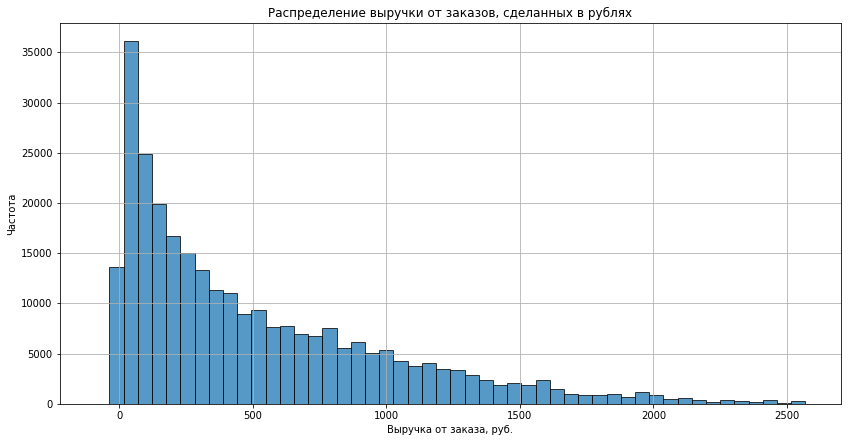

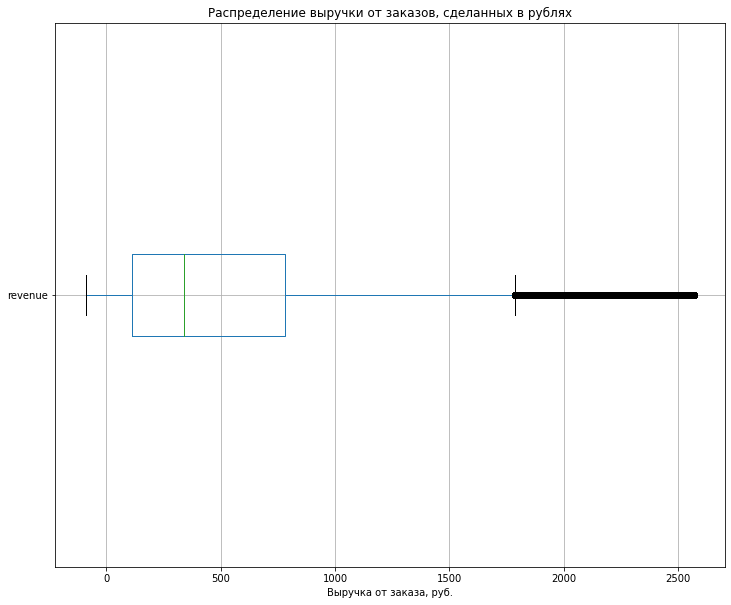

In [24]:
plt.figure(figsize=(14, 7))

# Строим гистограмму с помощью pandas через plot(kind='hist')
afisha_df[afisha_df['currency_code']=='rub']['revenue'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение выручки от заказов, сделанных в рублях')
plt.xlabel('Выручка от заказа, руб.')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

boxplot = afisha_df[afisha_df['currency_code']=='rub'].boxplot(column='revenue',
                     vert=False, 
                     figsize=(12, 10))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение выручки от заказов, сделанных в рублях')
boxplot.set_xlabel('Выручка от заказа, руб.')

plt.show()

Как видно из графиков, количество выбросов стало значительно ниже.
Далее проведём аналогичные операции с заказами, сделанными в тенге.

In [25]:
# Выведем статистические показатели по столбцу tickets_count
afisha_df[afisha_df['currency_code']=='kzt']['revenue'].describe()

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

Для заказов, сделанных в рублях, среднее значение выручки составляет `4995,21`, медиана - `3698,83`.
Построим гистограмму распределения и диаграмму размаха.

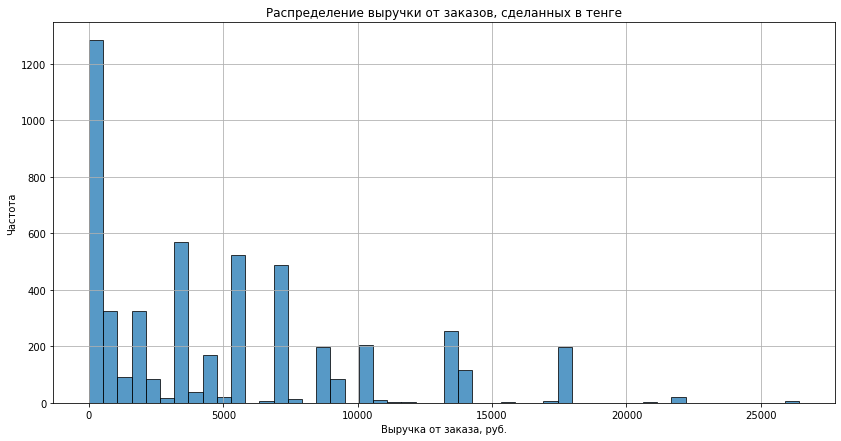

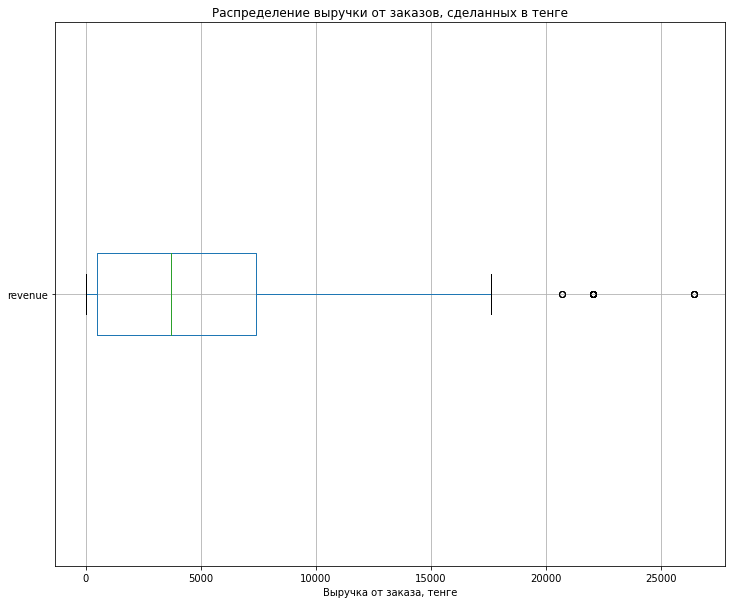

In [26]:
plt.figure(figsize=(14, 7))

# Строим гистограмму с помощью pandas через plot(kind='hist')
afisha_df[afisha_df['currency_code']=='kzt']['revenue'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение выручки от заказов, сделанных в тенге')
plt.xlabel('Выручка от заказа, руб.')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

boxplot = afisha_df[afisha_df['currency_code']=='kzt'].boxplot(column='revenue',
                     vert=False, 
                     figsize=(12, 10))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение выручки от заказов, сделанных в тенге')
boxplot.set_xlabel('Выручка от заказа, тенге')

plt.show()

На графиках видно, что выручка от заказов, сделанных в тенге, распределена крайне неравномерно. Также наблюдается наличие выбросов. Для дальнейшего анализа отберём значения по 99-му процентилю. Такж сразу удалим образовашиеся пустые строки.

In [27]:
# Отберём заказы, сделанные в тенге по 99-му процентилю по выручке
border = afisha_df[afisha_df['currency_code'] == 'kzt']['revenue'].quantile(0.99)
afisha_df[afisha_df['currency_code']=='kzt'] = afisha_df[(afisha_df['currency_code'] == 'kzt') & (afisha_df['revenue'] < border)]

# Удалим пустые строки
afisha_df.dropna(how='all', inplace=True)

# Выведем информацию об обновлённом датафрейме
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287529 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287529 non-null  float64
 1   user_id                 287529 non-null  object 
 2   created_dt_msk          287529 non-null  object 
 3   created_ts_msk          287529 non-null  object 
 4   event_id                287529 non-null  float64
 5   cinema_circuit          287529 non-null  object 
 6   age_limit               287529 non-null  float64
 7   currency_code           287529 non-null  object 
 8   device_type_canonical   287529 non-null  object 
 9   revenue                 287529 non-null  float64
 10  service_name            287529 non-null  object 
 11  tickets_count           287529 non-null  float64
 12  total                   287529 non-null  float64
 13  days_since_prev         265840 non-null  float64
 14  event_name          

Построим распределение по набору значений, очищенному от выбросов.

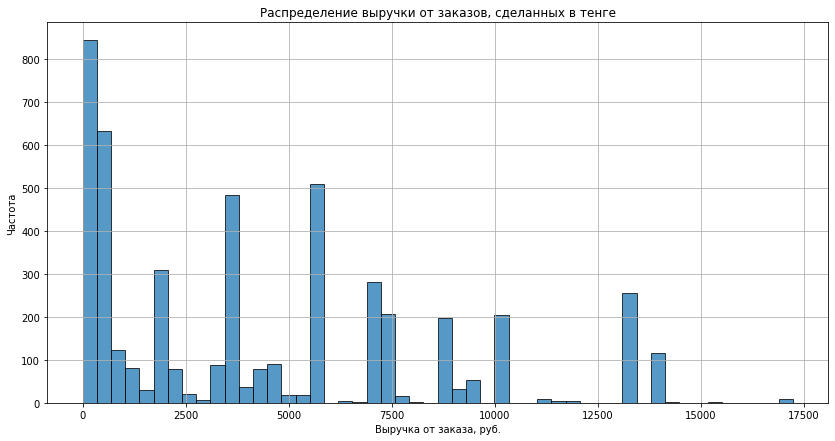

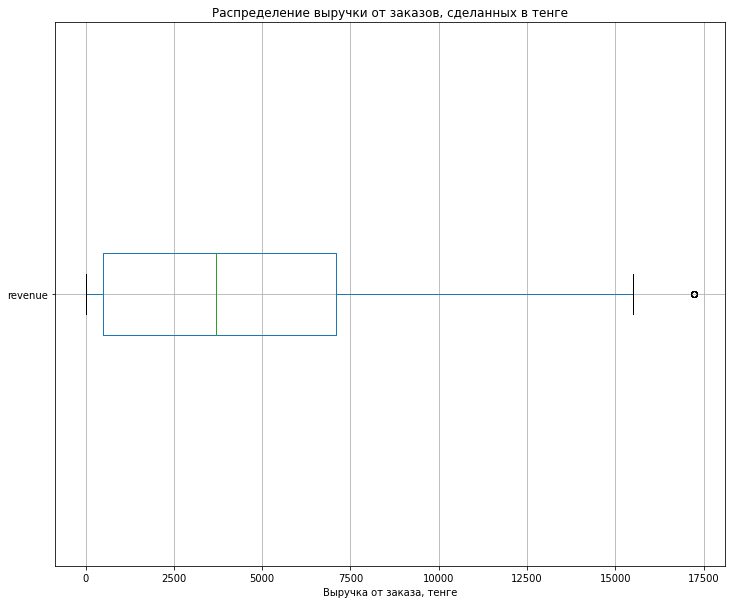

In [28]:
plt.figure(figsize=(14, 7))

# Строим гистограмму с помощью pandas через plot(kind='hist')
afisha_df[afisha_df['currency_code']=='kzt']['revenue'].plot(
                kind='hist', 
                bins=50, 
                alpha=0.75,
                edgecolor='black',
)

# Настраиваем оформление графика
plt.title('Распределение выручки от заказов, сделанных в тенге')
plt.xlabel('Выручка от заказа, руб.')
plt.ylabel('Частота')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show() 

boxplot = afisha_df[afisha_df['currency_code']=='kzt'].boxplot(column='revenue',
                     vert=False, 
                     figsize=(12, 10))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение выручки от заказов, сделанных в тенге')
boxplot.set_xlabel('Выручка от заказа, тенге')

plt.show()

Как видно из обновлённой диаграммы распределения, выбросы отсутствуют. В результате удаления выбросов, количество записей сократилось с `290 611` до `287 529`.

### 2.4 Удаление дубликтов

Проверим датафрейм на явные дубликаты методом `duplicated()`.

In [29]:
# Проверяем полные дубликаты в датафрейме afisha_df
afisha_df.duplicated().sum()

0

Всего вышло 3081 явлный дубликат.

Далее изучим датафрейм на неявные дубликаты. Рассмотрим неявные дубликаты по бронированию билета без учёта идентификаторов заказа. Для этого создадим отдельный датафрейм без учёта идентификатора заказа.

In [30]:
# Создадим датафрейм afisha_df_dubl, не включающий в себя столбец order_id
afisha_df_dubl = afisha_df.drop('order_id', axis=1)

Выведем количество дубликатов в получившемся датафрейме.

In [31]:
# Выведем количество дубликатов в получившемся датафрейме
display(afisha_df_dubl.duplicated().sum())

30

Всего вышло 30 дубликатов, что выведем их отдельно.

In [32]:
# Выведем дубликаты
dubl_without_orders = afisha_df_dubl[afisha_df_dubl.duplicated()].sort_values(by=['user_id','revenue', 'event_id'])
dubl_without_orders

,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
11760,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706.0,нет,18.0,rub,mobile,69.82,Билеты в руки,...,69796237-909b-42a7-bfb5-c1b8574c4c76,спектакль,театр,№1482,Светополянский округ,Глиноград,54.0,4443.0,"Центр культурного наследия ""Объединение"" и пар...","бул. Карбышева, д. 50"
57176,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005.0,нет,6.0,rub,mobile,11.23,Лови билет!,...,bee8d0cc-282b-492e-9ed8-ec0990f43ffd,выставка,другое,№1810,Яблоневская область,Горяново,11036.0,1656.0,"Модная академия ""Пункт"" Лимитед","бул. Гагарина, д. 39"
83937,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504.0,нет,6.0,rub,mobile,59.19,Билеты в руки,...,dcb6fe75-8502-480d-b8a2-6bee187cb7ee,событие,выставки,№5015,Нежинская область,Каменёвка,76.0,3094.0,"Сообщество художников ""Палитра"" и партнеры","пр. Театральный, д. 161 стр. 2"
148351,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203.0,нет,0.0,rub,mobile,26.96,Лучшие билеты,...,88478781-0311-42e3-b0ea-d4d6a171b70a,спорт,спорт,№1503,Чистогорская область,Песчанская,21.0,2155.0,"Клуб моделей ""Гармония"" Инк","ул. Прохладная, д. 8 к. 432"
154865,7eb4fc207ecc10f,2024-09-21,2024-09-21 11:43:58,448579.0,нет,0.0,rub,mobile,2.54,Лови билет!,...,a751c430-d352-44d7-99a0-29e97193eba5,спорт,спорт,№1622,Североярская область,Озёрск,2.0,4607.0,"Команда артистов ""Светлячок"" Лимитед","пер. Невского, д. 72"
154045,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035.0,нет,6.0,rub,mobile,126.84,Билеты без проблем,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
154050,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035.0,нет,6.0,rub,mobile,126.84,Билеты без проблем,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
156087,7eb4fc207ecc10f,2024-10-26,2024-10-26 09:39:03,418836.0,нет,0.0,rub,mobile,294.85,Лови билет!,...,a4478837-4631-4e28-95d7-a4c26751a232,цирковое шоу,другое,№1703,Тепляковская область,Горнодолинск,43.0,4481.0,"Школа сценического мастерства ""Вдох"" Лтд","пер. Полярный, д. 87"
174441,8d6c1ff89fac35f,2024-10-31,2024-10-31 22:28:57,589624.0,нет,16.0,rub,desktop,41.83,Мой билет,...,c9eb1fa4-257b-4290-975a-7fe34b46d11b,концерт,концерты,№2121,Каменевский регион,Глиногорск,213.0,1365.0,"Картинная галерея ""Светлячок"" Лтд","ул. Дальневосточная, д. 97 к. 1/4"
176295,8f95286aa5fd8d7,2024-06-20,2024-06-20 10:57:19,244875.0,нет,0.0,rub,mobile,15.73,Лови билет!,...,61f8b9bd-a66f-4cd9-ae10-a0e62e923476,выставка,другое,№3906,Каменноозёрный край,Ордакент,12.0,2492.0,"Кинофестиваль ""Хранитель"" Инкорпорэйтед","пр. Балтийский, д. 8 к. 51"


Выведем какой процент составляет количество дубликатов от общего размера датафрейма

In [33]:
# Выведем какой процент составляет количество дубликатов от общего размера датафрейма
afisha_df_dubl.duplicated().sum()/len(afisha_df)*100

0.010433730162870528

Количество вывявленных дубликатов составило 0,01%, что является крайне малой долей от общего размера всего датафрейма и их удаление существенно не повлияет на дальнейший анализ.

Для дальнейшего анализа удалим выявленные дубликаты

In [34]:
# Удаляем дубликаты
afisha_df.drop_duplicates(subset=afisha_df.columns.drop('order_id').tolist(), keep='first', inplace=True)

# Выведем информацию о обновлённом датафрейме
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287499 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287499 non-null  float64
 1   user_id                 287499 non-null  object 
 2   created_dt_msk          287499 non-null  object 
 3   created_ts_msk          287499 non-null  object 
 4   event_id                287499 non-null  float64
 5   cinema_circuit          287499 non-null  object 
 6   age_limit               287499 non-null  float64
 7   currency_code           287499 non-null  object 
 8   device_type_canonical   287499 non-null  object 
 9   revenue                 287499 non-null  float64
 10  service_name            287499 non-null  object 
 11  tickets_count           287499 non-null  float64
 12  total                   287499 non-null  float64
 13  days_since_prev         265810 non-null  float64
 14  event_name          

### 2.5 Преобразование типов данных

В данном подразделе преобразуем типы данных, а также снизим разрядность для некоторых столбцов

Для начала оптимизируем разрядность для столбцов, содержащих информацию в формате `int`, в том числе для столбцов `order_id`, `event_id`, `tickets_count`, `age_limit`, `city_id`, `venue_id`.

In [35]:
# Оптимизируем разрядность для столбца order_id
afisha_df['order_id'] = pd.to_numeric(afisha_df['order_id'],
                                    downcast='integer')

# Оптимизируем разрядность для столбца event_id
afisha_df['event_id'] = pd.to_numeric(afisha_df['event_id'],
                                    downcast='integer')

# Оптимизируем разрядность для столбца tickets_count
afisha_df['tickets_count'] = pd.to_numeric(afisha_df['tickets_count'],
                                    downcast='integer')

# Оптимизируем разрядность для столбца age_limit
afisha_df['age_limit'] = pd.to_numeric(afisha_df['age_limit'],
                                    downcast='integer')

# Оптимизируем разрядность для столбца city_id
afisha_df['city_id'] = pd.to_numeric(afisha_df['city_id'],
                                    downcast='integer')

# Оптимизируем разрядность для столбца venue_id
afisha_df['venue_id'] = pd.to_numeric(afisha_df['venue_id'],
                                    downcast='integer')

Далее скорректируем формат для столбца `days_since_prev` с `float`на `int`. Для этого необходимо предварительно избавиться от пропусков в столбце. Заменим их на `0` методом `fillna()`.

In [36]:
# Заменим пропуски на 0 в столбце days_since_prev
afisha_df['days_since_prev'] = afisha_df['days_since_prev'].fillna(0)

Далее сменим формат с `float`на `int` с установлением оптимальной разрядностью.

In [37]:
# формат для столбца `days_since_prev` с `float`на `int` с оптимальной разрядностью
afisha_df['days_since_prev'] = pd.to_numeric(afisha_df['days_since_prev'],
                                    downcast='integer')

Далее оптимизируем разрядность для столбцов, содержащих информацию в формате `float`, в том числе для столбцов `revenue` и `total`.

In [38]:
# Оптимизируем разрядность для столбца revenue
afisha_df['revenue'] = pd.to_numeric(afisha_df['revenue'],
                                    downcast='float')

# Оптимизируем разрядность для столбца total
afisha_df['total'] = pd.to_numeric(afisha_df['total'],
                                    downcast='float')

Далее для столбцов `created_dt_msk` и `created_ts_msk` сменим формат с `object` на `datetime` методом `to_datetime`, т.к. данные столбцы содержат информацию о дате и времени заказов.

In [39]:
# Скорректируем формат с object на datetime для столбца created_dt_msk
afisha_df['created_dt_msk'] = pd.to_datetime(afisha_df['created_dt_msk'])

# Скорректируем формат с object на datetime для столбца created_ts_msk
afisha_df['created_ts_msk'] = pd.to_datetime(afisha_df['created_ts_msk'])

Выведем обновлённую информацию о датафрйеме после всех преобразований.

In [40]:
# Выведем обновлённую информацию о датафрейме
afisha_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287499 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287499 non-null  int32         
 1   user_id                 287499 non-null  object        
 2   created_dt_msk          287499 non-null  datetime64[ns]
 3   created_ts_msk          287499 non-null  datetime64[ns]
 4   event_id                287499 non-null  int32         
 5   cinema_circuit          287499 non-null  object        
 6   age_limit               287499 non-null  int8          
 7   currency_code           287499 non-null  object        
 8   device_type_canonical   287499 non-null  object        
 9   revenue                 287499 non-null  float32       
 10  service_name            287499 non-null  object        
 11  tickets_count           287499 non-null  int8          
 12  total                   287499

Как видно из выгрузки все преобразования прошли корректно, для столбцов `order_id`, `event_id`, `tickets_count`, `age_limit`, `city_id`, `venue_id`, `revenue` и `total` была снижена разрядность, для столбцов `days_since_prev`, `created_dt_msk` и `created_ts_msk` были изменены форматы.

### 2.6 Создание новых столбцов

Создадим новый столбец `revenue_rub`, с выручкой с заказа с единой валютой — российским рублём. Для этого загрузим датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv за 2024 год.

In [41]:
# Создадим датафрейм tenge_df, содержащий данные из датасета final_tickets_tenge_df.csv
tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

# Выведем несколько строк датафрейма tenge_df
tenge_df

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt
...,...,...,...,...
352,2024-12-27,100,19.2705,kzt
353,2024-12-28,100,19.5105,kzt
354,2024-12-29,100,19.4860,kzt
355,2024-12-30,100,19.4860,kzt


Выведем общую информацию о датафрейме методом `info()`.

In [42]:
# Выведем общую информацию о датафрйеме tenge_df
tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Далее присоединим датафрйем `tenge_df` к датафрйему `afisha_df`. Объединение необходимо осуществлять по столбцам `data` датафрйем `tenge_df` и `created_dt_msk` датафрйема `afisha_df`. Однако, т.к. столбец `data` содержит данные в формате `object`, для него необходимо заменить формат данных на `datetime`. Также оптимизируем разрядность для столбца `nominal`.

In [43]:
# Скорректируем формат с object на datetime для столбца created_ts_msk
tenge_df['data'] = pd.to_datetime(tenge_df['data'])

# формат для столбца `days_since_prev` с `float`на `int` с оптимальной разрядностью
tenge_df['nominal'] = pd.to_numeric(tenge_df['nominal'],
                                    downcast = 'integer')

Далее соединим датафреймы `tenge_df` и `afisha_df` по столбцам `created_dt_msk` и `data`, выведем полученный датафрйем.

In [44]:
# Объединим датафреймы orders_df и events_df
afisha_df = afisha_df.merge(tenge_df, left_on ='created_dt_msk', right_on ='data', how='left')

# Выведем полученный датафрейм
display(afisha_df.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


Далее создадим столбец `revenue_rub`, по умолчанию присвоим ему значения из столбца `revenue`. Затем для заказов, осуществлённых в тенге, проведём конвертацию выручки в рубли от заказа как значения из столбца `revenue` умноженные на значения столбца `curs` и разделим полученное произведение на значения столбца  `nominal`.

In [45]:
# Создадим столбец revenue_rub
afisha_df['revenue_rub'] = afisha_df['revenue']

# Проведём конвертацию выручки в рубли для заказов, сделанных в тенге
afisha_df.loc[afisha_df['currency_code'] == 'kzt', 'revenue_rub'] = (afisha_df['revenue']*afisha_df['curs'])/afisha_df['nominal']

Выведем данные для заказов, сделанных в тенге. Как видно из выгрузки, конвертация была осуществлена корректно.

In [46]:
# Выведем данные для заказов, сделанных в тенге
afisha_df[afisha_df  ['currency_code']=='kzt'].head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub
70,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.099976,...,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",2024-09-17,100,19.0125,kzt,98.503761
88,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.179993,...,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",2024-09-02,100,18.9330,kzt,65.731590
95,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.769989,...,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",2024-09-09,100,18.5991,kzt,61.148258
453,5227657,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:28:17,533803,нет,16,kzt,desktop,7397.660156,...,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-06-04,100,19.9833,kzt,1478.296631
454,2229782,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:17:35,533803,нет,16,kzt,mobile,3698.830078,...,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-06-04,100,19.9833,kzt,739.148315


Далее удалим лишние столбцы, которые не будут использоваться для дальнейшего анализа, методом `drop()`.

In [47]:
# Удалим столбцы data,nominal, cdx
afisha_df = afisha_df.drop(['data','nominal', 'cdx'], axis=1)

# Выведем обновлённый датафрйем
afisha_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,1521.939941
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,289.450012
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,1258.569946
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",18.5010,8.490000
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",19.6648,1390.410034


Создадим столбец `one_ticket_revenue_rub`, в котором будет отражена выручка с продажи одного билета на мероприятие. Для этого значения по столбцу `revenue_rub` разделим на значения столбца `tickets_count`.

In [48]:
# Создадим столбец one_ticket_revenue_rub
afisha_df['one_ticket_revenue_rub'] =  afisha_df['revenue_rub'] / afisha_df['tickets_count']

# Выведем обновлённый датафрйем
afisha_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub,one_ticket_revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,1521.939941,380.484985
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,289.450012,144.725006
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,1258.569946,314.642487
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",18.5010,8.490000,4.245000
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",19.6648,1390.410034,463.470001


Далее создадим столбец `month` методом `dt.month`, в котором будет указан номер месяца оформления заказа.

In [49]:
# Cоздадим столбец `month`
afisha_df['month'] = afisha_df['created_ts_msk'].dt.month

# Выведем обновлённый датафрйем
afisha_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub,one_ticket_revenue_rub,month
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,1521.939941,380.484985,8
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,289.450012,144.725006,7
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,1258.569946,314.642487,10
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",18.5010,8.490000,4.245000,7
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",19.6648,1390.410034,463.470001,10


Далее создадим столбец `season`, в котором будет отражено название сезона, в котором был сделан заказ. Для этого используем функцию `apply()`.

In [50]:
# Создадим функцию season, которая будет присваивать название сезона в зависимости от номера месяца.
def season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

afisha_df['season'] = afisha_df['month'].apply(season)

# Выведем обновлённый датафрейм
afisha_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,1521.939941,380.484985,8,Лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,289.450012,144.725006,7,Лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,1258.569946,314.642487,10,Осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",18.5010,8.490000,4.245000,7,Лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",19.6648,1390.410034,463.470001,10,Осень


### Промежуточный вывод

Таким образом, в данном разделе была осуществлена предобработка данных для дальнейшего анализа.
На первом этапе была осуществлена обработка пропусков, возникших в результате удаления информации о мероприятиях категории `фильмы`. Общее количество пропусков составило менее 0,1%. Данные пропуски были удалены из датафрейма по столбцу `event_id`, в результате количество записей в дататфрйеме сократилось с `290 849` до `290 611`.

Далее для категориальных значений было рассмотрено, какие категории присутствуют в данных, а также  изучено, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. Для этого были рассмотрены уникальные значения по столбцам `cinema_circuit`, `age_limit`, `currency_code`, `device_type_canonical`, `event_type_description`, `event_type_main`, `organizers`. В результате анализа значений,  обозначающие пропуски, обнаружено не было.

На следующем этапе для количественных значений было рассмотрено распределение и наличие выбросов. В том числе были рассмотрены столбцы `tickets_count`, `revenue`, `total`, при это для столбцов `revenue`, `total` было рассмотрено распределение отдельно для заказов, сделанных в рублях и для заказов, сделанных в тенге. По результатам анализа были исключены выбросы по столбцу `revenue`по 99-му процентилю, в результате чего объём датафрйема сократился с `290 611` записей до `287 782`.

Далее датафрйем был изучен на дубликаты. Явных дубликатов выявлено не было. Однако были выявлены неявные дубликаты по бронированию билета без учёта идентификаторов заказа, количество которых составило 30 штук. Поскольку количество дубликатов оказалось незначительным, они были удалены, в результате чего количество записей в датафрейме сократилось с `287 782` до `287 752`.

На следующем этапе было осуществлено преобразование типов данных. Для столбцов `order_id`, `event_id`, `tickets_count`, `age_limit`, `city_id`, `venue_id`, `revenue` и `total` была снижена разрядность, для столбцов `days_since_prev`, `created_dt_msk` и `created_ts_msk` были изменены форматы.

На заключительном шаге были добавлены новые столбцы. В  том числе был добавлен столбец `revenue_rub`, отражающий выручку для всех заказов в единой валюте - в рублях. Для этого к общем датафрйему был присоединён датафрейм `tenge_df`, содержащий информацию о курсах валют в разные дни, и на основе которого, заказы, осуществленные в тенге были приведены к рублям. Также был создан столбец `one_ticket_revenue_rub`, в котором была отражена выручка с одного билета для каждого заказа. Далее были созданы столбцы `month` и  `season`, содержавшие информацию о месяце и сезоне заказа.

## 3. Исследовательский анализ данных

### 3.1 Анализ распределения заказов по сегментам и их сезонные изменения

На первом шаге для каждого месяца найдём количество заказов и визуализируем результаты. Для начала заменим номер месяца на название методом `replace()` для большей наглядности.

In [51]:
# Заменим номер месяца на название
afisha_df['month'] = afisha_df['month'].replace({
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь'
})
afisha_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,1521.939941,380.484985,Август,Лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,289.450012,144.725006,Июль,Лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,1258.569946,314.642487,Октябрь,Осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",18.5010,8.490000,4.245000,Июль,Лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",19.6648,1390.410034,463.470001,Октябрь,Осень


Далее выведем количество заказов в разрезе месяца методом `groupby()`.

In [52]:
# Сгруппируем количество заказов по месяцам
afisha_df.groupby('month')['order_id'].nunique().sort_values()

month
Июнь        33974
Июль        40405
Август      44541
Сентябрь    69319
Октябрь     99260
Name: order_id, dtype: int64

Как видно из выгрузки, количество заказов увеличивается с каждым месяцем. Визуализируем результаты. В качестве способы визуализации используем диаграмму.

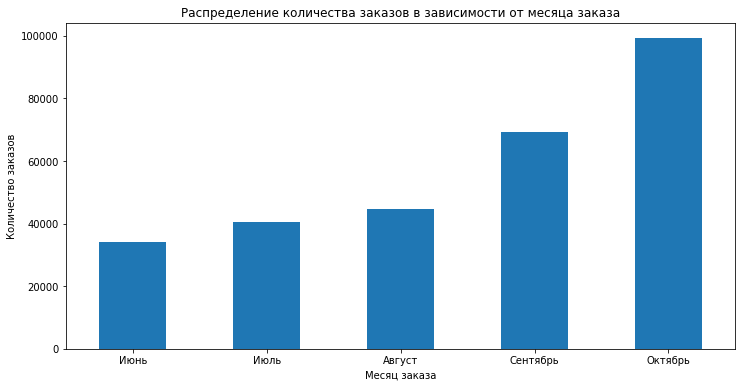

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
afisha_df.groupby('month')['order_id'].nunique().sort_values().plot(
               kind='bar',
               rot=0, 
               legend=False, 
               title=f'Распределение количества заказов в зависимости от месяца заказа'
)

# Настраиваем оформление графика
plt.xlabel('Месяц заказа')
plt.ylabel('Количество заказов')


# Выводим график
plt.show()

На визуализации также наглядно видно, что количество заказов увеличивается с каждым месяцем.

Далее для осеннего и летнего периодов сравним распределение заказов билетов по типу мероприятия.
Для начала выведем количество заказов в разрезе типа мероприятия и сезона.

In [54]:
# Выведем количество заказов в разрезе типа мероприятия и сезона
afisha_df.groupby(['event_type_main','season'])['order_id'].count().unstack()

season,Лето,Осень
event_type_main,,
выставки,2416,2436
другое,32369,33225
концерты,50567,62688
спорт,3006,18881
стендап,6346,6923
театр,23943,42735
ёлки,273,1691


Как видно из визуализцаии по все категориям мероприятий наблюдался рост количества заказов. 
Поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используем доли. Для этого выведем соотношение количества заказов в разные сезоны в разрезе типа мероприятия.

In [55]:
# Выведем соотношение количества заказов в разные сезоны в разрезе типа мероприятия
gr_by_event_type = afisha_df.groupby(['event_type_main','season'])['order_id'].count()/(afisha_df.groupby(['season'])['order_id'].count())
gr_by_event_type

event_type_main  season
выставки         Лето      0.020316
                 Осень     0.014450
другое           Лето      0.272191
                 Осень     0.197089
концерты         Лето      0.425219
                 Осень     0.371861
спорт            Лето      0.025277
                 Осень     0.112001
стендап          Лето      0.053364
                 Осень     0.041067
театр            Лето      0.201337
                 Осень     0.253501
ёлки             Лето      0.002296
                 Осень     0.010031
Name: order_id, dtype: float64

Далее создадим визуализацию для данного соотношения.

<Figure size 864x432 with 0 Axes>

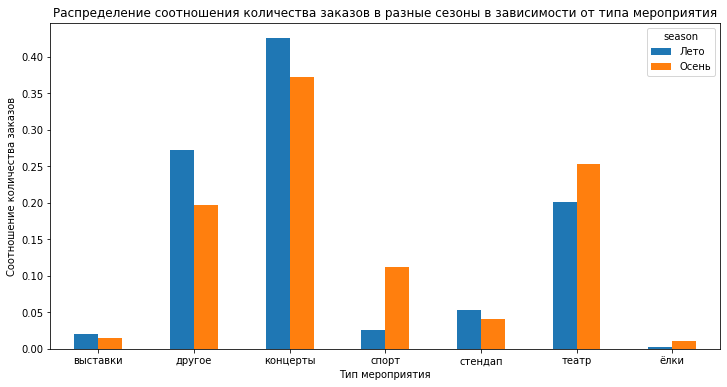

In [56]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
gr_by_event_type.unstack().plot(
               kind='bar',
               rot=0, 
               figsize=(12, 6), 
               legend=True, 
               title=f'Распределение соотношения количества заказов в разные сезоны в зависимости от типа мероприятия'
)

# Настраиваем оформление графика
plt.xlabel('Тип мероприятия')
plt.ylabel('Соотношение количества заказов')


# Выводим график
plt.show()

Как видно из визуализцаии осенью увеличилась доля заказов среди таких мероприятий как `спорт`,`ёлки`,`театр`, для всех остальных категорий показатель снизился.

Далее рассмотрим распределение заказов в разрезе типов устройств.

In [57]:
# Выведем количество заказов в разрезе типа мероприятия и сезона
afisha_df.groupby(['device_type_canonical','season'])['order_id'].count().unstack()

season,Лето,Осень
device_type_canonical,,
desktop,22973,34296
mobile,95947,134283


Количество заказов для обеих категорий существенно увеличилось. Рассмотрим соотношение долей количества заказов по сезонам и выведем соответствующую визуализацию.

In [58]:
# Выведем соотношение количества заказов в разные сезоны в разрезе типа мероприятия
gr_by_dev_type = afisha_df.groupby(['device_type_canonical','season'])['order_id'].count()/(afisha_df.groupby('season')['order_id'].count())
gr_by_dev_type

device_type_canonical  season
desktop                Лето      0.193180
                       Осень     0.203442
mobile                 Лето      0.806820
                       Осень     0.796558
Name: order_id, dtype: float64

<Figure size 864x432 with 0 Axes>

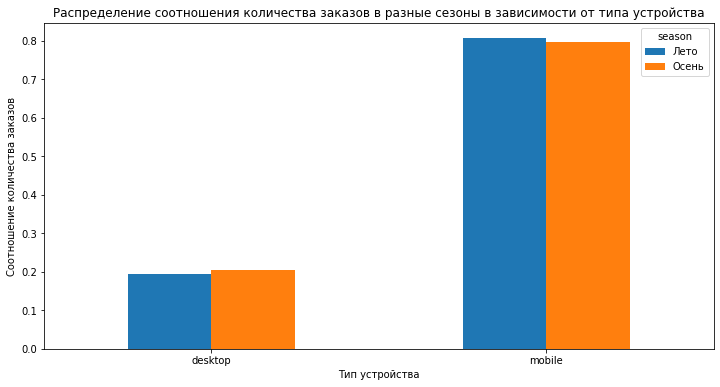

In [59]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
gr_by_dev_type.unstack().plot(
               kind='bar',
               rot=0, 
               legend=True, 
               figsize=(12, 6), 
               title=f'Распределение соотношения количества заказов в разные сезоны в зависимости от типа устройства'
)

# Настраиваем оформление графика
plt.xlabel('Тип устройства')
plt.ylabel('Соотношение количества заказов')


# Выводим график
plt.show()

Из диаграммы видно, что доля заказов, со стационарных устройств осенью немного увеличилась.

Далее рассмотрим распределение заказов по возрастному рейтингу. Выведем количества заказов в разрезе возрастных категорий. 

In [60]:
# Выведем количество заказов в разрезе типа мероприятия и сезона
afisha_df.groupby(['age_limit','season'])['order_id'].count().unstack()

season,Лето,Осень
age_limit,,
0,21404,39828
6,21673,29720
12,24263,37211
16,33756,44217
18,17824,17603


Из выгрузки видно, что для всех возрастных категорий, количество заказов заметно увеличилось. Исключение составила категория `от 18 лет`, для которой число заказов снизилось. Выведем соотношение количества заказов в зависимости от сезона.

In [61]:
# Выведем соотношение количества заказов в зависимости от сезона
gr_by_age_type = afisha_df.groupby(['age_limit','season'])['order_id'].count()/(afisha_df.groupby('season')['order_id'].count())
gr_by_age_type

age_limit  season
0          Лето      0.179987
           Осень     0.236257
6          Лето      0.182249
           Осень     0.176297
12         Лето      0.204028
           Осень     0.220733
16         Лето      0.283855
           Осень     0.262292
18         Лето      0.149882
           Осень     0.104420
Name: order_id, dtype: float64

Визуализируем результаты.

<Figure size 864x432 with 0 Axes>

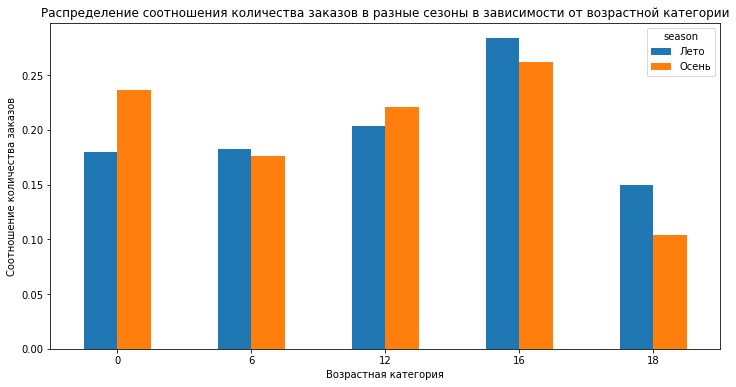

In [62]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
gr_by_age_type.unstack().plot(
               kind='bar',
               rot=0, 
               legend=True, 
               figsize=(12, 6), 
               title=f'Распределение соотношения количества заказов в разные сезоны в зависимости от возрастной категории'
)

# Настраиваем оформление графика
plt.xlabel('Возрастная категория')
plt.ylabel('Соотношение количества заказов')


# Выводим график
plt.show()

Из визуализации также видно, что Доля заказов увеличилась для таких возрастных категорий как `0+`, `12+`, в то время как для категорий `6+`, `16+`, `18+` показатель снизился, при этом наиболее существенно снизилась доля для категории`18+`.

Далее рассмотрим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью. Для начала рассчитаем среднюю стоимость билета в разрезе разных категорий мероприятий в разные сезоны.

In [63]:
# Выведем количество заказов в разрезе типа мероприятия и сезона
mean_ticket_rev = afisha_df.groupby(['event_type_main','season'])['one_ticket_revenue_rub'].mean().unstack()
mean_ticket_rev

season,Лето,Осень
event_type_main,,
выставки,86.416199,90.603607
другое,77.433968,76.115334
концерты,302.576080,268.027527
спорт,50.761833,49.969734
стендап,218.518112,231.124969
театр,214.138855,175.969513
ёлки,271.436188,229.585587


Далее выведем относительную разницу между сезонами.

In [64]:
# Выведем относительную разницу между сезонами
mean_ticket_rev ['Разница,%'] = (mean_ticket_rev ['Осень'] -  mean_ticket_rev ['Лето']) / mean_ticket_rev ['Лето'] *100
mean_ticket_rev 

season,Лето,Осень,"Разница,%"
event_type_main,,,
выставки,86.416199,90.603607,4.845629
другое,77.433968,76.115334,-1.702914
концерты,302.576080,268.027527,-11.418138
спорт,50.761833,49.969734,-1.560422
стендап,218.518112,231.124969,5.769250
театр,214.138855,175.969513,-17.824575
ёлки,271.436188,229.585587,-15.418211


Из расчётов видно, что практически для всех категорий событий, средняя выручка с одного билета снизилась. Исключение составили категории `выставки` и `стендап`. Больше всего показатель снизился для категорий `театр` и `ёлки`.

Далее выведем соответствующую визуализацию.

<Figure size 864x432 with 0 Axes>

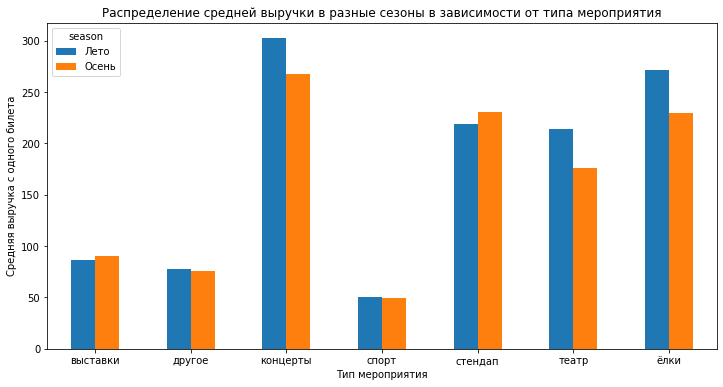

In [65]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
afisha_df.groupby(['event_type_main','season'])['one_ticket_revenue_rub'].mean().unstack().plot(
               kind='bar',
               rot=0, 
               legend=True, 
               figsize=(12, 6), 
               title=f'Распределение средней выручки в разные сезоны в зависимости от типа мероприятия'
)

# Настраиваем оформление графика
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя выручка с одного билета')


# Выводим график
plt.show()

Из графика также наглядно видно, что значение средней выручки осенью снизилось для таких категорий как `другое`,`концерты`,`спорт`,`театр`, `ёлки` и увеличилось для мероприятий типа `выставки` и `ёлки`.

Далее визуализируем относительную разницу насколько изменилась выручка с продажи одного билета.

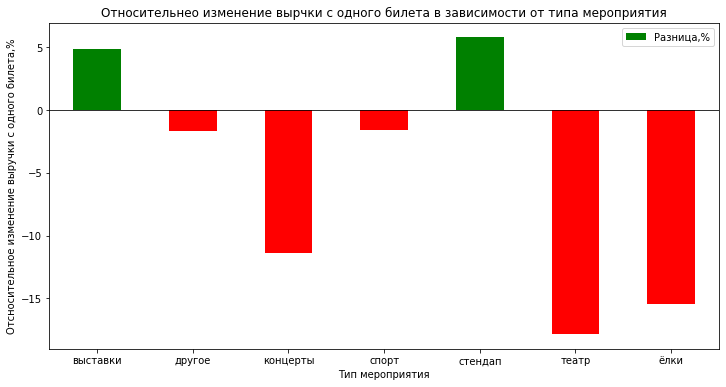

In [66]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
mean_ticket_rev ['Разница,%'].plot(
               kind='bar',
               rot=0, 
               legend=True, 
               figsize=(12, 6), 
            color=['green' if x >= 0 else 'red' for x in mean_ticket_rev ['Разница,%']],
               title=f'Относительнео изменение вырчки с одного билета в зависимости от типа мероприятия'
)

# Настраиваем оформление графика
plt.xlabel('Тип мероприятия')
plt.ylabel('Отсносительное изменение выручки с одного билета,%')
plt.axhline(0, color='black', linewidth=0.8)

# Выводим график
plt.show()

Как видно из диаграммы сильнее всего снизилась выручка с билета для таких как `театр`. Далее следуют мероприятия типа `ёлки` и `концерты`. Для мероприятий категории `стендап` показатель увеличился чуть выше для категории `выставки`.

Таким образом, с наступлением осени по все категориям мероприятий наблюдался рост количества заказов. Наибольший рост зафиксирован для событий, относящихся к категориям `спорт`,`ёлки`,`театр`, наименее значительно увеличилось количество заказов для мероприятий типа `выставки` и `другое`.

Также рост числа заказов наблюдался для обоих типов устройств - `desktop` и `mobile`. При этом доля для стационарных устройств немного увеличилась осенью. 

Также увеличилось число заказов для мероприятий всех возрастных категорий кроме `18+`, наибольший рост зафиксирован для событий категории `0+`. Доля заказов увеличилась для таких возрастных категорий как `0+`, `12+`, в то время как для категорий `6+`, `16+`, `18+` показатель снизился, при этом наиболее существенно снизилась доля для категории`18+`.

Средняя выручка с одного билета снизилась для событий категорий `другое`,`концерты`,`спорт`,`театр`, `ёлки` и напротив увеличилась для категорий  `стендап` и `выставки`. При этом наибольший относительный спад зафиксирован для категорий `театр` и `ёлки` - 17,8% и 15,4% соответственно.

### 3.2. Осенняя активность пользователей

В данном подразделе рассчитаем по дням для осеннего сезона общее число заказов, количество активных пользователей DAU, среднее число заказов на одного пользователя, среднюю стоимость одного билета.

Для начала с помощью сводной таблицы выведем число заказов и число уникальных пользователей.

In [67]:
# Создадим сводную таблицу, в которой рассчитаем число заказов и число уникальных пользователей
pivot_table = pd.pivot_table(afisha_df[afisha_df['season']=='Осень'], index="created_dt_msk",
                             values=["order_id",'user_id'],
                             aggfunc="nunique")

pivot_table.columns = [ 'total_orders', 'dau']
pivot_table

,total_orders,dau
created_dt_msk,,
2024-09-01,1327,564
2024-09-02,1380,574
2024-09-03,5111,778
2024-09-04,1772,685
2024-09-05,1944,739
...,...,...
2024-10-27,2849,1034
2024-10-28,2838,985
2024-10-29,2836,998


Далее на основе полученной таблицы выведем среднее число заказов на одного пользователя.

In [68]:
# Выведем среднее число заказов на одного пользователя
pivot_table ['mean_orders_per_day'] = pivot_table ['total_orders'] / pivot_table ['dau']
pivot_table

,total_orders,dau,mean_orders_per_day
created_dt_msk,,,
2024-09-01,1327,564,2.352837
2024-09-02,1380,574,2.404181
2024-09-03,5111,778,6.569409
2024-09-04,1772,685,2.586861
2024-09-05,1944,739,2.630582
...,...,...,...
2024-10-27,2849,1034,2.755319
2024-10-28,2838,985,2.881218
2024-10-29,2836,998,2.841683


Далее отдельно рассчитаем среднюю стоимость одного билета. Для этого создадим отдельный датафрейм `mean_ticket_price`, в котором рассчитаем по дням общую стоимость заказов и количество билетов, после чего разделим значения получившихся столбцов друг на друга.

In [69]:
# Создадим датафрейм с рассчитанными в нём  по дням общей стоимости заказов и количество билетов
mean_ticket_price = afisha_df[afisha_df['season']=='Осень'].groupby('created_dt_msk').agg(total=('total', 'sum'), total_tickets=(('tickets_count', 'sum')))

# Рассчитаем на основе полученного датафрейма среднюю стоимость билетов по дням
mean_ticket_price['mean_ticket_price'] = mean_ticket_price['total'] / mean_ticket_price['total_tickets']

# Выведем полученный результат
mean_ticket_price

,total,total_tickets,mean_ticket_price
created_dt_msk,,,
2024-09-01,8515271.0,3718.0,2290.282679
2024-09-02,9346841.0,3704.0,2523.445194
2024-09-03,20557060.0,15290.0,1344.477436
2024-09-04,11922728.0,4800.0,2483.901667
2024-09-05,13584018.0,5214.0,2605.296893
...,...,...,...
2024-10-27,17522916.0,7867.0,2227.394941
2024-10-28,16057849.0,7927.0,2025.715782
2024-10-29,16293745.0,7962.0,2046.438709


Построим график, на котором будет отражена динамика общего числа заказов по дням.

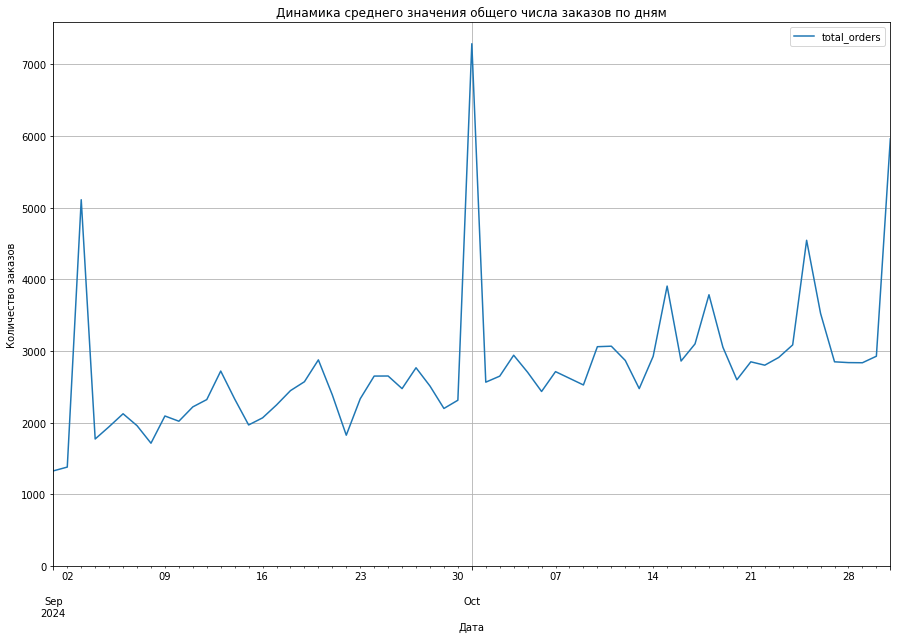

In [70]:
# Построим график с динамикой общего числа заказов по дням
pivot_table['total_orders'].plot(kind='line', figsize=(15, 10))

# Настраиваем оси
plt.title('Динамика среднего значения общего числа заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend(loc='upper right')
plt.ylim(0)
plt.grid()
plt.show()

Как видно из графика наблюдается тенденция к росту количества заказов. При этом в начале сентября, начале октября и конце октября были зафиксированы разовые резкие увеличения количества заказов.

Далее построим график для количества уникальных пользователей.

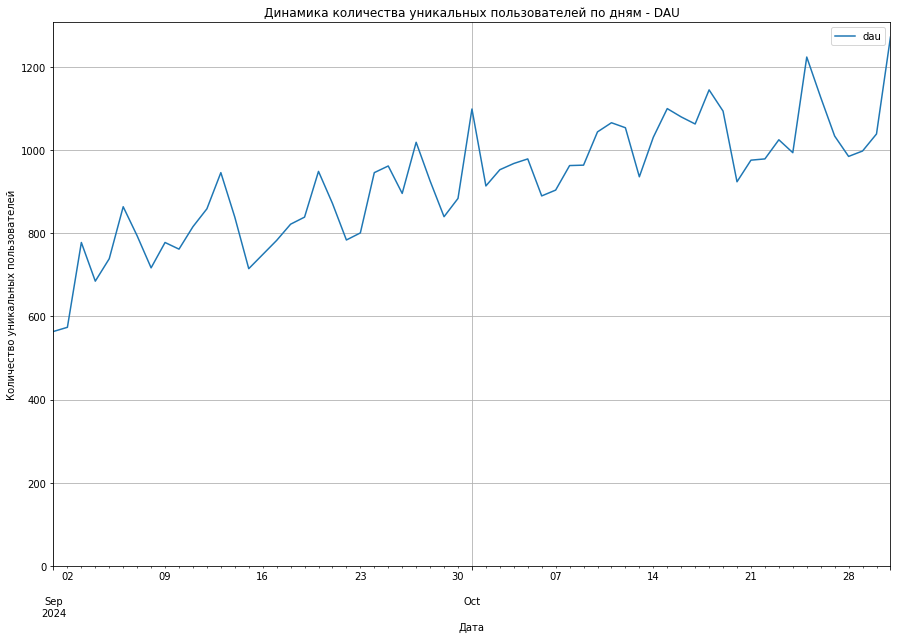

In [71]:
# Построим график с динамикой количества уникальных пользователей по дням
pivot_table['dau'].plot(kind='line', figsize=(15, 10))

# Настраиваем оси
plt.title('Динамика количества уникальных пользователей по дням - DAU')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0)
plt.show()

Из графика видно, что на протяжении рассматриваемого периода имеются определённые колебания в динамике количестве ежедневных уникальных пользователей. Тем не менее, в динамике показателя наблюдается общая тенденция к росту.

Далее построим график среднего числа заказов на одного пользователя.

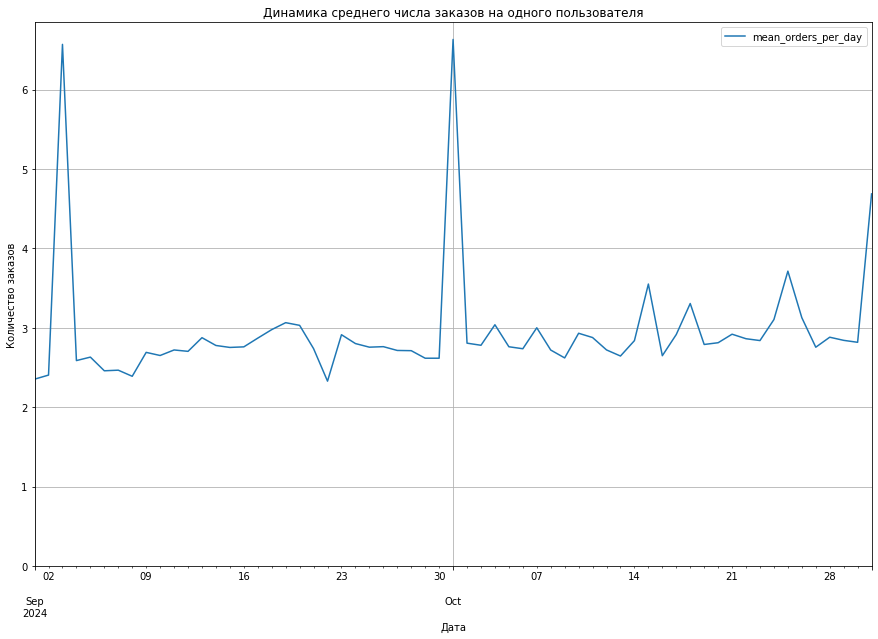

In [72]:
# Построим график с динамикой числа заказов на одного пользователя по дням
pivot_table['mean_orders_per_day'].plot(kind='line', figsize=(15, 10))

# Настраиваем оси
plt.title('Динамика среднего числа заказов на одного пользователя')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0)
plt.show()

Динамика среднего количества заказов в многом повторяет динамику общего числа заказов по дням. Существенные увеличения показателя были зафиксированы в начале сентября, начале октября и конце октября.

Построим график средней стоимости одного билета.

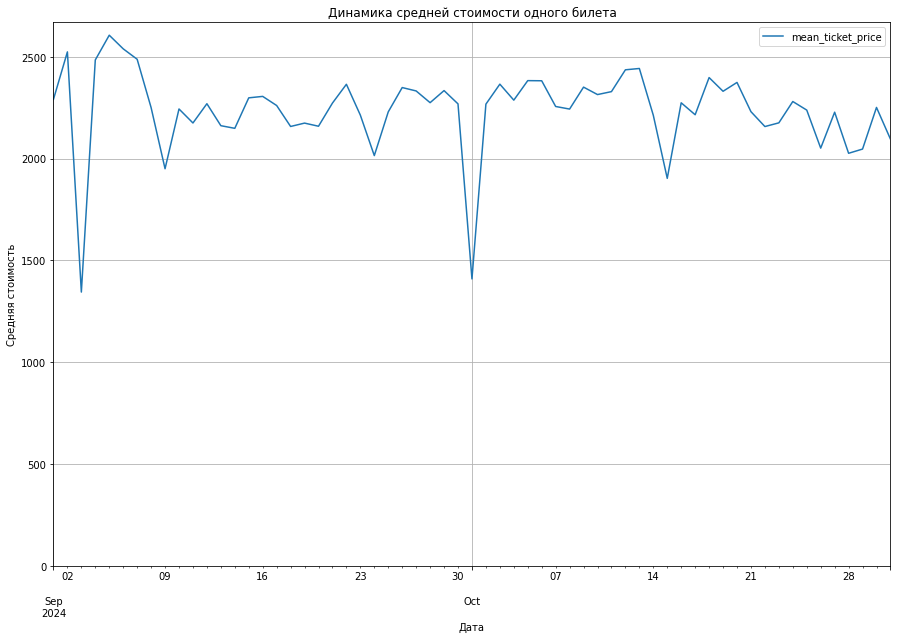

In [73]:
# Построим график с динамикой средней стоимости одного билета по дням
mean_ticket_price['mean_ticket_price'].plot(kind='line', figsize=(15, 10))

# Настраиваем оси
plt.title('Динамика средней стоимости одного билета')
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость')
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0)
plt.show()

Из графика видно, что динамика средней стоимости одного билета достаточна нестабильна. При этом были зафиксированы резкие спады показателя в периоды, когда значения общего числа заказов и среднего количества заказов на пользователя напротив увеличивались.

Далее изучим недельную цикличность по дням недели. Для этого на первом шаге выведем в таблице `pivot_table` номер для недели с помощью функции `dt.weekday`.

In [74]:
# Сбросим индексы
pivot_table = pivot_table.reset_index()

# Изменим формат для столбца created_dt_msk
pivot_table['created_dt_msk'] = pd.to_datetime(pivot_table['created_dt_msk'])

# Выведем для каждого дня номер дня недели
pivot_table['day_of_the_week'] = pivot_table['created_dt_msk'].dt.weekday

# Выведем полученный результат
pivot_table

,created_dt_msk,total_orders,dau,mean_orders_per_day,day_of_the_week
0,2024-09-01,1327,564,2.352837,6
1,2024-09-02,1380,574,2.404181,0
2,2024-09-03,5111,778,6.569409,1
3,2024-09-04,1772,685,2.586861,2
4,2024-09-05,1944,739,2.630582,3
...,...,...,...,...,...
56,2024-10-27,2849,1034,2.755319,6
57,2024-10-28,2838,985,2.881218,0
58,2024-10-29,2836,998,2.841683,1
59,2024-10-30,2927,1039,2.817132,2


Далее отсортируем количество заказов по дням недели.

In [75]:
# Отсортируем количество заказов по дням недели
total_orders_per_dotw = pivot_table.groupby('day_of_the_week')['total_orders'].sum().reset_index().sort_index()

# Выведем полученный результат
total_orders_per_dotw

,day_of_the_week,total_orders
0,0,21511
1,1,31479
2,2,22878
3,3,27166
4,4,24824
5,5,21333
6,6,19388


Для более удобного восприятия заменим номера дней недели на названия.

In [76]:
# Заменим номера дней недели на названия
total_orders_per_dotw.replace({
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}, inplace=True)

total_orders_per_dotw.set_index('day_of_the_week', inplace=True)

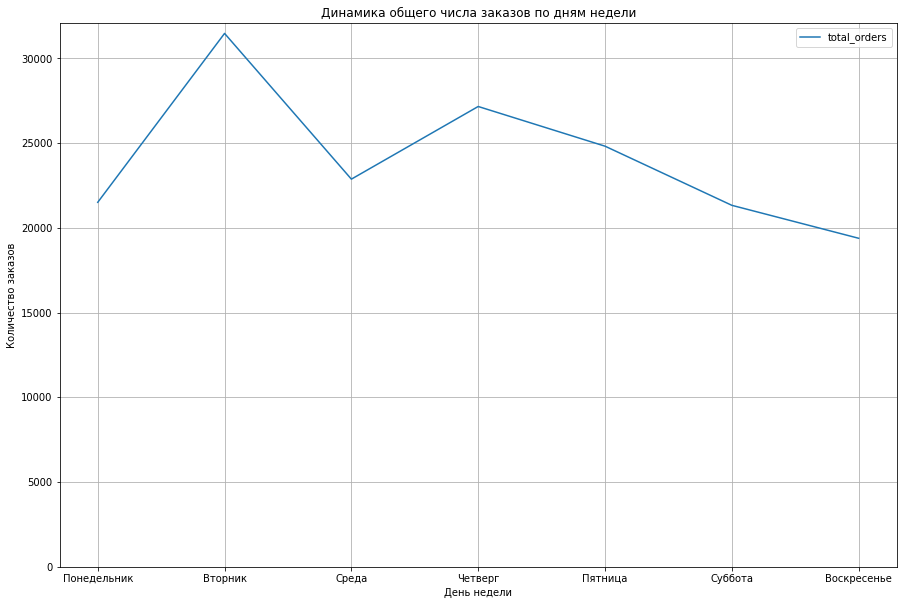

In [77]:
# Построим график с динамикой количества заказов по дням недели
total_orders_per_dotw['total_orders'].plot(kind='line',  figsize=(15, 10))

# Настраиваем оси
plt.title('Динамика общего числа заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0)
plt.show()

Из графика видно, наибольшее количество заказов было осуществлено во вторник и четверг, при этом в выходные количество показателей существенно снижается.

Далее рассмотрим динамику по дням недели для уникального количества пользователей. Для этого также отсортируем число пользователей по дням, и также заменим номера дней недели на названия.

In [78]:
# Отсортируем число пользователей по дням
dau_per_dotw = pivot_table.groupby('day_of_the_week')['dau'].sum().reset_index().sort_index()

# Заменим номера дней недели на названия
dau_per_dotw.replace({
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}, inplace=True)

dau_per_dotw.set_index('day_of_the_week', inplace=True)

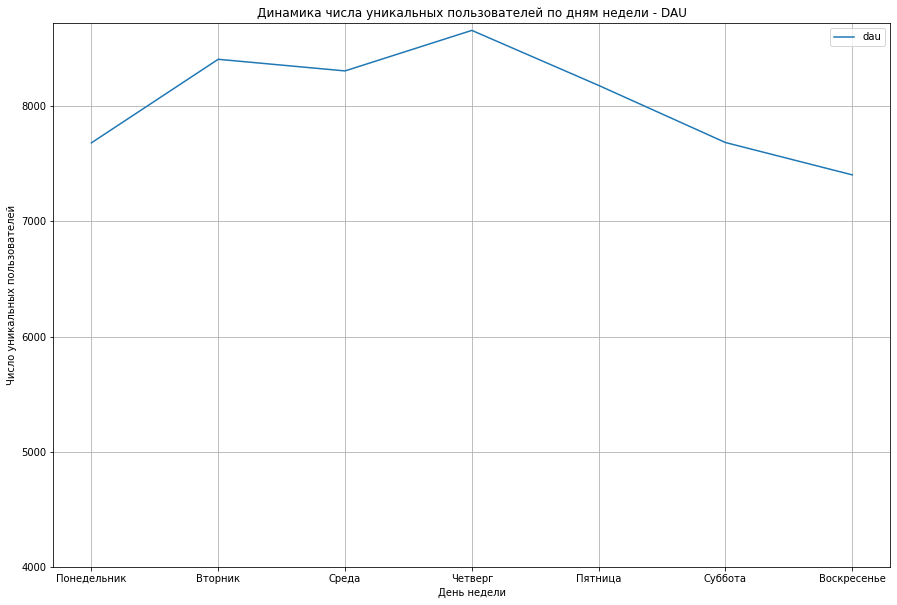

In [79]:
# Построим график с динамикой числа уникальных пользовтаелей по дням недели
dau_per_dotw['dau'].plot(kind='line',  figsize=(15, 10))

# Настраиваем оси
plt.title('Динамика числа уникальных пользователей по дням недели - DAU')
plt.xlabel('День недели')
plt.ylabel('Число уникальных пользователей')
plt.legend(loc='upper right')
plt.grid()
plt.ylim(4000)
plt.show()

Из графика видно, что как и в случае с общим количеством заказов, максимальное количество уникальных пользователей наблюдается во вторник и четверг, при этом в выходные заметно снижается.

Далее рассчитаем среднее числа заказов на одного пользователя по дням недели.

In [80]:
# Отсортируем количество заказов по дням недели
mean_orders_per_dotw = pivot_table.groupby('day_of_the_week')['mean_orders_per_day'].mean().reset_index().sort_index()

# Выведем полученный результат
mean_orders_per_dotw

,day_of_the_week,mean_orders_per_day
0,0,2.780168
1,1,3.721904
2,2,2.752337
3,3,3.064035
4,4,3.001603
5,5,2.761356
6,6,2.598452


Для более удобного восприятия заменим номера дней недели на названия и построим визуализацию для показателя.

In [81]:
# Заменим номера дней недели на названия
mean_orders_per_dotw.replace({
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}, inplace=True)

mean_orders_per_dotw.set_index('day_of_the_week', inplace=True)

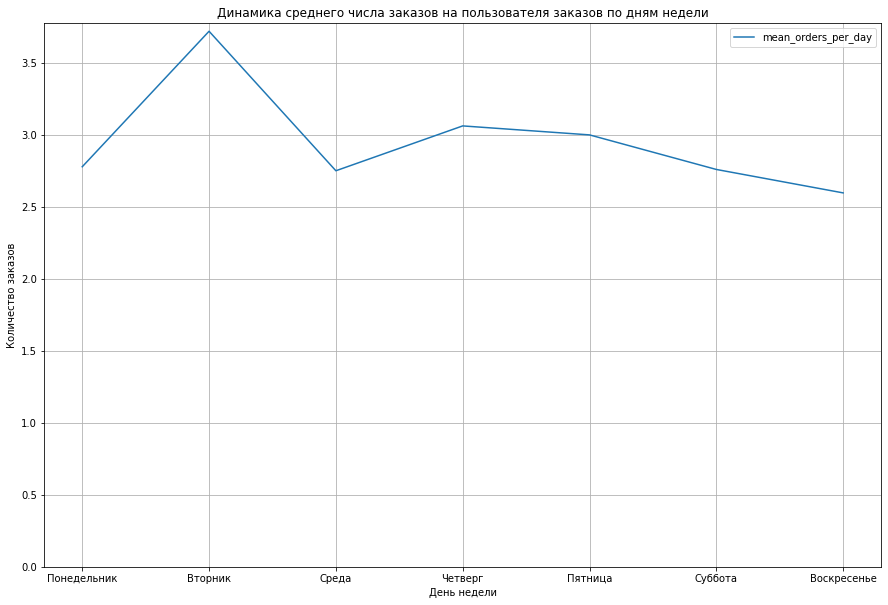

In [82]:
# Построим график с динамикой количества заказов по дням недели
mean_orders_per_dotw['mean_orders_per_day'].plot(kind='line',  figsize=(15, 10))

# Настраиваем оси
plt.title('Динамика среднего числа заказов на пользователя заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0)
plt.show()

Из графика видно, что наибольшее среднее число заказов на пользователя приходится на вторник и четверг, при этом показатель снижается на выходных, что в целом повторяет динамику общего числа заказов.

Далее рассмотрим динамику по дням недели для средней стоимости одного билета. Для этого для таблицы `mean_ticket_price` выведем номер дня недели.

In [83]:
# Сбросим индексы
mean_ticket_price = mean_ticket_price.reset_index()

# Изменим формат для столбца created_dt_msk
mean_ticket_price['created_dt_msk'] = pd.to_datetime(mean_ticket_price['created_dt_msk'])

# Выведем для каждого дня номер дня недели
mean_ticket_price['day_of_the_week'] = mean_ticket_price['created_dt_msk'].dt.weekday

# Выведем полученный результат
mean_ticket_price

,created_dt_msk,total,total_tickets,mean_ticket_price,day_of_the_week
0,2024-09-01,8515271.0,3718.0,2290.282679,6
1,2024-09-02,9346841.0,3704.0,2523.445194,0
2,2024-09-03,20557060.0,15290.0,1344.477436,1
3,2024-09-04,11922728.0,4800.0,2483.901667,2
4,2024-09-05,13584018.0,5214.0,2605.296893,3
...,...,...,...,...,...
56,2024-10-27,17522916.0,7867.0,2227.394941,6
57,2024-10-28,16057849.0,7927.0,2025.715782,0
58,2024-10-29,16293745.0,7962.0,2046.438709,1
59,2024-10-30,18148120.0,8063.0,2250.790029,2


Далее рассчитаем среднюю цену билета для каждого дня недели

In [84]:
# Отсортируем количество заказов по дням недели
mean_ticket_price_per_dotw = mean_ticket_price.groupby('day_of_the_week')['mean_ticket_price'].mean().reset_index().sort_index()

# Выведем полученный результат
mean_ticket_price_per_dotw

,day_of_the_week,mean_ticket_price
0,0,2220.319085
1,1,1957.804927
2,2,2262.382516
3,3,2296.192121
4,4,2304.990017
5,5,2297.592228
6,6,2328.955811


Для более удобного восприятия заменим номера дней недели на названия и построим визуализацию для показателя.

In [85]:
# Заменим номера дней недели на названия
mean_ticket_price_per_dotw.replace({
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}, inplace=True)

mean_ticket_price_per_dotw.set_index('day_of_the_week', inplace=True)

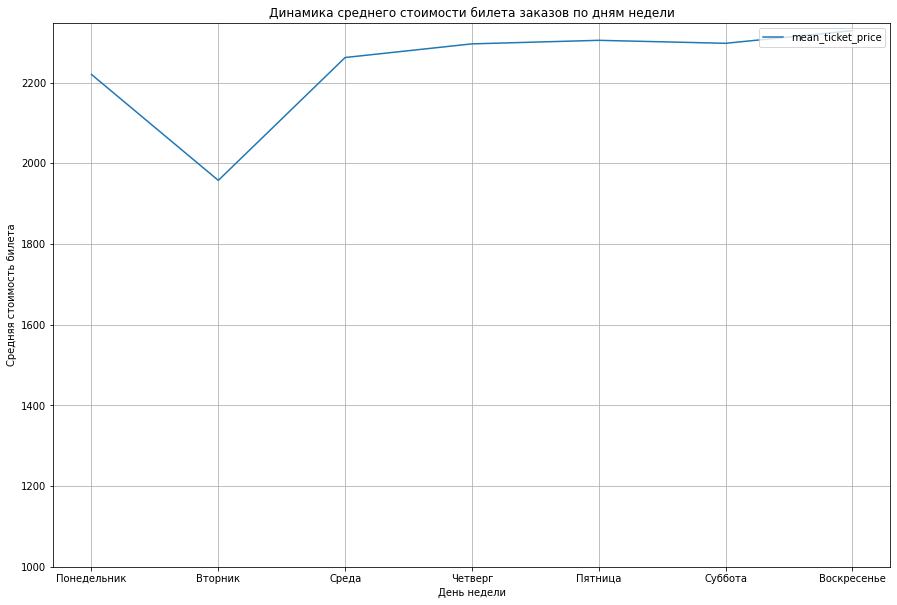

In [86]:
# Построим график с динамикой количества заказов по дням недели
mean_ticket_price_per_dotw['mean_ticket_price'].plot(kind='line',  figsize=(15, 10))

# Настраиваем оси
plt.title('Динамика среднего стоимости билета заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость билета')
plt.legend(loc='upper right')
plt.grid()
plt.ylim(1000)
plt.show()

Из график видно, что средняя стоимость билета заметно снижается во вторник, в день, когда наблюдается максимальное количестов заказов. При этом в дальнейшем средняя цена билетов увеличивается, в том числе в выходные дни, когда спрос существенно ниже.

Таким образом, можно сделать вывод, что для показателей `общего числа заказов` и `количества активных пользователей` наблюдается положительная динамика, при этом в начале сентября, начале октября и конце октября были зафиксированы разовые резкие увеличения количества заказов. Аналогичная динамика наблюдается для `среднего числа заказов на одного пользователя`  с существенными увеличениями показателя в начале сентября, начале октября и конце октября. Динамика `средней стоимости одного билета` абсолютно противоположна динамике общего числа заказов - существенные спады в динамике показателя зафиксированы в начале сентября, начале октября и конце октября.

Анализируя динамику о пользовательской активности по дням недели, можно отметить, что наибольшее число уникальных пользователей и общее число заказов было зафиксировано с середине недели, главным образом во вторник и четверг. При этом на выходных активность пользователей заметно снижалась.

### 3.3. Популярные события и партнёры

На первом этапе для каждого региона посчитаем уникальное количество мероприятий и общее число заказов.

In [87]:
# Для каждого региона посчитаем уникальное количество мероприятий и общее число заказов
top_regions = afisha_df[afisha_df['season']=='Осень'].groupby('region_name').agg(unique_events=('event_id', 'nunique'), total_orders=('order_id', 'nunique')).reset_index()
top_regions

,region_name,unique_events,total_orders
0,Белоярская область,44,132
1,Берестовский округ,25,322
2,Берёзовская область,42,348
3,Боровлянский край,76,1240
4,Верховинская область,6,30
...,...,...,...
74,Шанырский регион,17,658
75,Широковская область,803,8715
76,Яблоневская область,432,4199
77,Ягодиновская область,93,662


Выведем топ-30 регионов по количеству уникальных событий.

In [88]:
# Выведем топ регионов по количеству уникальных событий
top_events = top_regions[['region_name', 'unique_events']].sort_values('unique_events', ascending = False).head(30)

# Сменим индексы для последующей визуализации
top_events.set_index('region_name', inplace=True) 
top_events

,unique_events
region_name,
Каменевский регион,3910
Североярская область,2613
Широковская область,803
Светополянский округ,764
Речиновская область,529
Серебринская область,456
Яблоневская область,432
Тепляковская область,419
Горицветская область,406


Как видно из выгрузки среди регионов со значительным отрывом лидирующую позицию по количеству уникальных событий занимает `Каменевский регион`, далее c существенным отставанием следует `Североярская область`, а также `Широковская область` и `Светополянский округ`. Далее выведем топ-регионов по количеству заказов.

In [89]:
# Выведем топ регионов по количеству заказов
top_orders = top_regions[['region_name', 'total_orders']].sort_values('total_orders', ascending = False).head(30)

# Заменим индексы для последующей визуализации
top_orders.set_index('region_name', inplace=True) 
top_orders

,total_orders
region_name,
Каменевский регион,46684
Североярская область,20718
Медовская область,12044
Широковская область,8715
Озернинский край,7480
Светополянский округ,4779
Серебринская область,4467
Малиновоярский округ,4412
Солнечноземская область,4228


Как и в случае с числом уникальных мероприятий, лидирующую позицию по количеству заказов с болим отрывом занимает `Каменевский регион`. Дальше также следует `Североярская область` и `Широковская область`. Четвёртую позицию занимает `Медовская область`. 

Для лучшей наглядности выведем долю проводимых мероприятий от их общего числа и долю заказов от общего количества заказов для каждого региона. Для этого создадим два дополнительных столбца, где будет указана доля для каждого региона по количеству уникальных событий  и общему числу заказов.

In [90]:
# Выведем столбец с долей мероприятий для каждого региона от общего количества событий
top_regions['total_events_share'] = top_regions['unique_events']/top_regions['unique_events'].sum()*100

# Выведем столбец с долей заказов для каждого региона от общего количества заказов
top_regions['total_orders_share'] = top_regions['total_orders']/top_regions['total_orders'].sum()*100

# Выведем полученный результат
top_regions

,region_name,unique_events,total_orders,total_events_share,total_orders_share
0,Белоярская область,44,132,0.277148,0.078302
1,Берестовский округ,25,322,0.157470,0.191008
2,Берёзовская область,42,348,0.264550,0.206431
3,Боровлянский край,76,1240,0.478710,0.735560
4,Верховинская область,6,30,0.037793,0.017796
...,...,...,...,...,...
74,Шанырский регион,17,658,0.107080,0.390321
75,Широковская область,803,8715,5.057949,5.169683
76,Яблоневская область,432,4199,2.721088,2.490820
77,Ягодиновская область,93,662,0.585790,0.392694


In [91]:
# Выведем топ 30 регионов по доле событий от общего количества событий
top_regions[['region_name', 'total_events_share']].sort_values('total_events_share', ascending = False).head(30)

,region_name,total_events_share
23,Каменевский регион,24.628370
59,Североярская область,16.458806
75,Широковская область,5.057949
56,Светополянский округ,4.812295
51,Речиновская область,3.332074
60,Серебринская область,2.872260
76,Яблоневская область,2.721088
67,Тепляковская область,2.639204
11,Горицветская область,2.557319
63,Солнечноземская область,2.538423


Как видно из выгрузки на `Каменевский регион` приходится `24,63%` всех событий, в то время как идущую за ней `Североярская область` - `16,46`%. На `Широковская область` и` Светополянский округ` приходится `5,06%` и `4,8%` соответственно.

Далее выведем топ-регионов по доле заказов от общего количества заказов.

In [92]:
# Выведем топ 30 регионов по доле заказов от общего количества заказов
top_regions[['region_name', 'total_orders_share']].sort_values('total_orders_share', ascending = False).head(30)

,region_name,total_orders_share
23,Каменевский регион,27.692654
59,Североярская область,12.289787
41,Медовская область,7.144425
75,Широковская область,5.169683
44,Озернинский край,4.437089
56,Светополянский округ,2.834873
60,Серебринская область,2.649796
40,Малиновоярский округ,2.617171
63,Солнечноземская область,2.508023
76,Яблоневская область,2.490820


Как видно из выгрузки на `Каменевский регион` приходится `27,69%` всех заказов, на идущую за ней `Североярская область` - `12,29%`. На `Медовскую область` и`Широковская область` приходится `7,14%` и `5,17%` соответственно.

Выведем диаграммы с количеством событий и заказов для топ- 10 регионов.

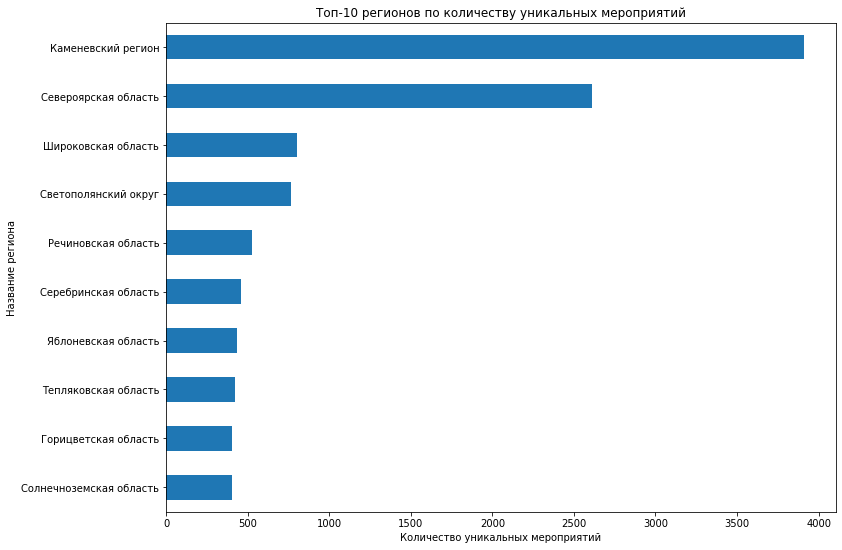

In [93]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))

 

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
top_events['unique_events'].sort_values().tail(10).plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Топ-10 регионов по количеству уникальных мероприятий'
)

# Настраиваем оформление графика
plt.xlabel('Количество уникальных мероприятий')
plt.ylabel('Название региона')


# Выводим график
plt.show()

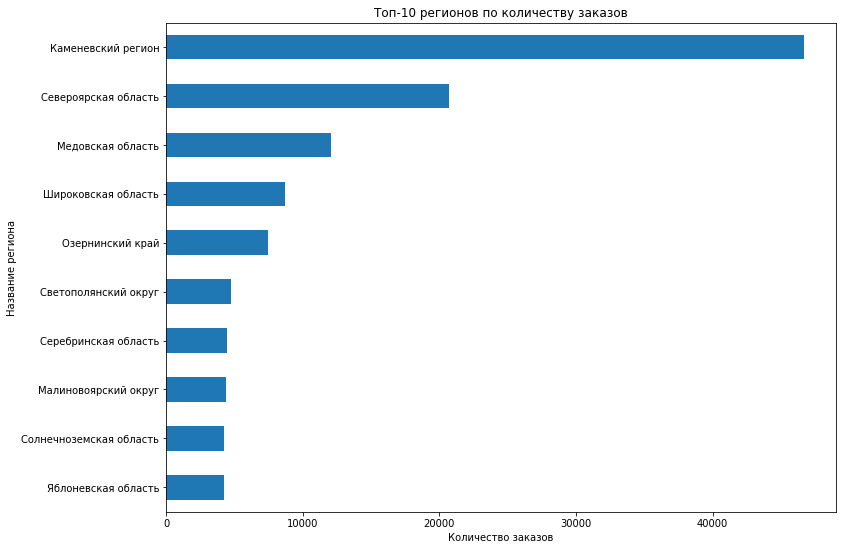

In [94]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))

 

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
top_orders['total_orders'].sort_values().tail(10).plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Топ-10 регионов по количеству заказов'
)

# Настраиваем оформление графика
plt.xlabel('Количество заказов')
plt.ylabel('Название региона')


# Выводим график
plt.show()

Далее для каждого билетного партнёра посчитаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов.

In [95]:
# Для каждого региона посчитаем уникальное количество мероприятий и общее число заказов
top_service_name = afisha_df[afisha_df['season']=='Осень'].groupby('service_name').agg(unique_events=('event_id', 'nunique'), total_orders=('order_id', 'nunique'), total_revenue=('revenue_rub', 'sum')).reset_index()
top_service_name['total_revenue'] = top_service_name['total_revenue'].round()
top_service_name

,service_name,unique_events,total_orders,total_revenue
0,Crazy ticket!,178,550,319452.0
1,Show_ticket,204,1300,906167.0
2,Билет по телефону,10,50,37808.0
3,Билеты без проблем,2847,32383,12116005.0
4,Билеты в интернете,1,4,548.0
5,Билеты в руки,2469,25728,7613384.0
6,Быстробилет,133,1162,929493.0
7,Быстрый кассир,1,8,7781.0
8,Весь в билетах,599,9406,9325571.0
9,Восьмёрка,92,390,238422.0


Выведем топ-30 операторов по количеству уникальных событий.

In [96]:
# Выведем топ регионов по количеству уникальных событий
top_events_service = top_service_name[['service_name', 'unique_events']].sort_values('unique_events', ascending = False).head(30)

# Сменим индексы для последующей визуализации
top_events_service.set_index('service_name', inplace=True) 
top_events_service

,unique_events
service_name,
Лови билет!,3616
Билеты без проблем,2847
Билеты в руки,2469
Облачко,1409
Лучшие билеты,1396
Мой билет,1005
Тебе билет!,859
Прачечная,728
Весь в билетах,599


Как видно из выгрузки лидирующую позицию занимает  оператор `Лови билет!` с `3616` уникальными событиями. Далее следуют `Билеты без проблем` и `Билеты в руки` с `2847` и `246` мероприятиями соответственно.

Далее выведем топ операторов по количеству заказов.

In [97]:
# Выведем топ регионов по количеству уникальных событий
top_orders_service = top_service_name[['service_name', 'total_orders']].sort_values('total_orders', ascending = False).head(30)

# Сменим индексы для последующей визуализации
top_orders_service.set_index('service_name', inplace=True) 
top_orders_service

,total_orders
service_name,
Билеты без проблем,32383
Лови билет!,25792
Билеты в руки,25728
Мой билет,19410
Облачко,15478
Лучшие билеты,12432
Весь в билетах,9406
Прачечная,5798
Тебе билет!,3749


Первое место по количеству заказов занимает  оператор `Билеты без проблем` с `32383` заказами. Далее следуют `Лови билет!` и `Билеты в руки` с `25792` и `25728` заказами соответственно.

Далее выведем топ операторов по объёму выручки.

In [98]:
# Выведем топ регионов по количеству уникальных событий
top_revenue_service = top_service_name[['service_name', 'total_revenue']].sort_values('total_revenue', ascending = False).head(30)

# Сменим индексы для последующей визуализации
top_revenue_service.set_index('service_name', inplace=True) 
top_revenue_service

,total_revenue
service_name,
Билеты без проблем,12116005.0
Мой билет,10830059.0
Облачко,10611052.0
Лови билет!,10376793.0
Весь в билетах,9325571.0
Билеты в руки,7613384.0
Край билетов,3018372.0
Яблоко,2763332.0
Прачечная,2548310.0


Первое место объёму привлечённой выручки занимает  оператор `Билеты без проблем`, за которым следуют `Мой билет` и `Облачко!`.

Для более качественного анализа выведем долю проводимых мероприятий от их общего числа для каждого оператора, а также аналогичные показатели по выручке и общему количеству заказов. Для этого, как и в случае с регионами, создадим дополнительные столбцы.

In [99]:
# Выведем столбец с долей мероприятий для каждого оператора от общего количества событий
top_service_name['total_events_share'] = top_service_name['unique_events']/top_service_name['unique_events'].sum()*100

# Выведем столбец с долей заказов для каждого оператора от общего количества заказов
top_service_name['total_orders_share'] = top_service_name['total_orders']/top_service_name['total_orders'].sum()*100

# Выведем столбец с долей заказов для каждого региона от общего объёма выручки
top_service_name['total_revenue_share'] = top_service_name['total_revenue']/top_service_name['total_revenue'].sum()*100

# Выведем полученный результат
top_service_name

,service_name,unique_events,total_orders,total_revenue,total_events_share,total_orders_share,total_revenue_share
0,Crazy ticket!,178,550,319452.0,1.029021,0.326257,0.390754
1,Show_ticket,204,1300,906167.0,1.179327,0.771152,1.108426
2,Билет по телефону,10,50,37808.0,0.057810,0.029660,0.046247
3,Билеты без проблем,2847,32383,12116005.0,16.458550,19.209391,14.820329
4,Билеты в интернете,1,4,548.0,0.005781,0.002373,0.000670
5,Билеты в руки,2469,25728,7613384.0,14.273326,15.261687,9.312711
6,Быстробилет,133,1162,929493.0,0.768875,0.689291,1.136958
7,Быстрый кассир,1,8,7781.0,0.005781,0.004746,0.009518
8,Весь в билетах,599,9406,9325571.0,3.462828,5.579580,11.407063
9,Восьмёрка,92,390,238422.0,0.531853,0.231346,0.291638


In [100]:
# Выведем топ 30 операторов по доле событий от общего количества событий
top_service_name[['service_name', 'total_events_share']].sort_values('total_events_share', ascending = False).head(30)

,service_name,total_events_share
21,Лови билет!,20.904151
3,Билеты без проблем,16.458550
5,Билеты в руки,14.273326
25,Облачко,8.145450
22,Лучшие билеты,8.070297
24,Мой билет,5.809920
30,Тебе билет!,4.965892
26,Прачечная,4.208579
8,Весь в билетах,3.462828
34,Яблоко,3.104405


Как видно из выгрузки, наибольшей долей уникальных мероприятий обладает оператор `Лови билет!` - 20.9%. Далее следуют `Билеты без проблем` и `Билеты в руки` с `16.46%` и `14.27%` соответственно. Для остальных операторов доля меньше 9%. 	

In [101]:
# Выведем топ 30 операторов по доле заказов от общего количества заказов
top_service_name[['service_name', 'total_orders_share']].sort_values('total_orders_share', ascending = False).head(30)

,service_name,total_orders_share
3,Билеты без проблем,19.209391
21,Лови билет!,15.299652
5,Билеты в руки,15.261687
24,Мой билет,11.513890
25,Облачко,9.181452
22,Лучшие билеты,7.374584
8,Весь в билетах,5.579580
26,Прачечная,3.439337
30,Тебе билет!,2.223883
34,Яблоко,2.060162


Лидирующую позицию по доле заказов занимает `Билеты без проблем` с  `19.21%`. Далее следуют `Лови билет!` - `15.3%` и `Билеты в руки` - `15.26%`. 

In [102]:
# Выведем топ 30 операторов по доле выручки от общего объёма выручки
top_service_name[['service_name', 'total_revenue_share']].sort_values('total_revenue_share', ascending = False).head(30)

,service_name,total_revenue_share
3,Билеты без проблем,14.820329
24,Мой билет,13.247355
25,Облачко,12.979465
21,Лови билет!,12.692920
8,Весь в билетах,11.407063
5,Билеты в руки,9.312711
19,Край билетов,3.692080
34,Яблоко,3.380115
26,Прачечная,3.117099
30,Тебе билет!,2.615085


По доле выручки на первом месте находится оператор `Билеты без проблем` - `14.82%`, за которым c небольшим отставанием следует `Мой билет`	- `13.25%` и `Облачко` -	`12.98%`.

Далее выведем визуализации с топ-10 операторами по количеству уникальных событий, количеству заказов и объёму привлечённой выручки.

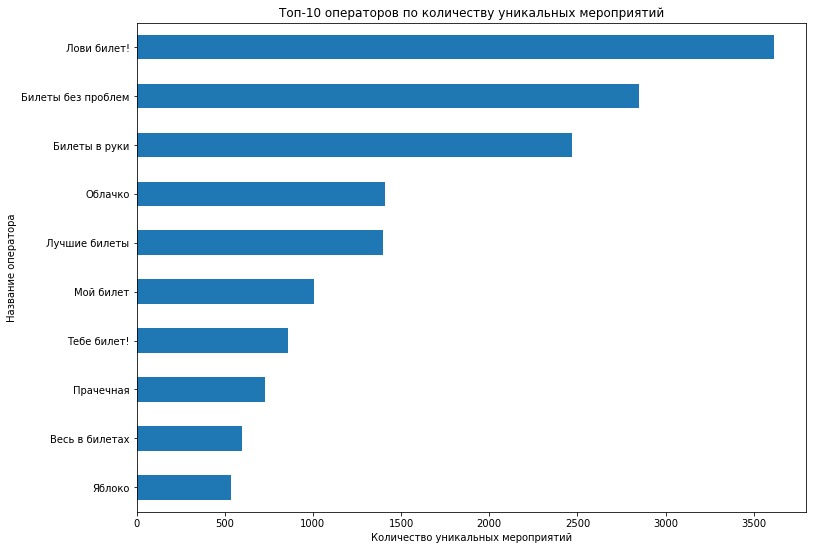

In [103]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))

 

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
top_events_service['unique_events'].sort_values().tail(10).plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Топ-10 операторов по количеству уникальных мероприятий'
)

# Настраиваем оформление графика
plt.xlabel('Количество уникальных мероприятий')
plt.ylabel('Название оператора')


# Выводим график
plt.show()

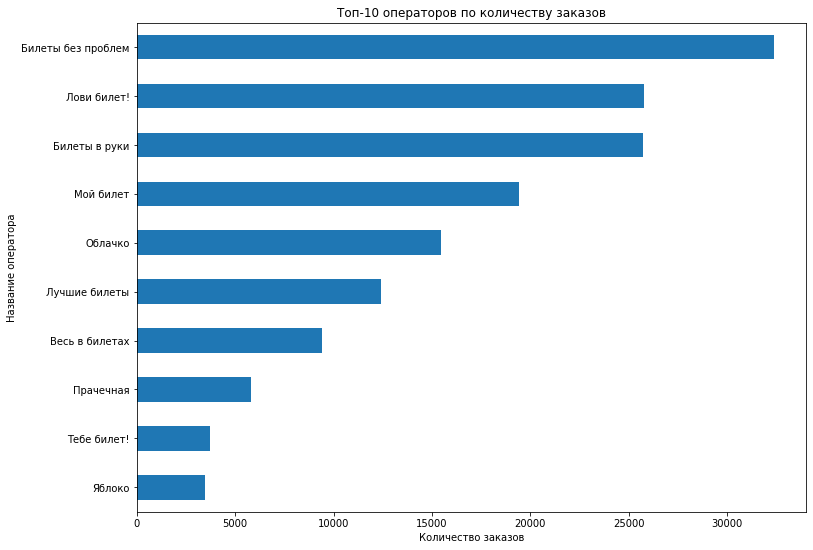

In [104]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))

 

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
top_orders_service['total_orders'].sort_values().tail(10).plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Топ-10 операторов по количеству заказов'
)

# Настраиваем оформление графика
plt.xlabel('Количество заказов')
plt.ylabel('Название оператора')


# Выводим график
plt.show()

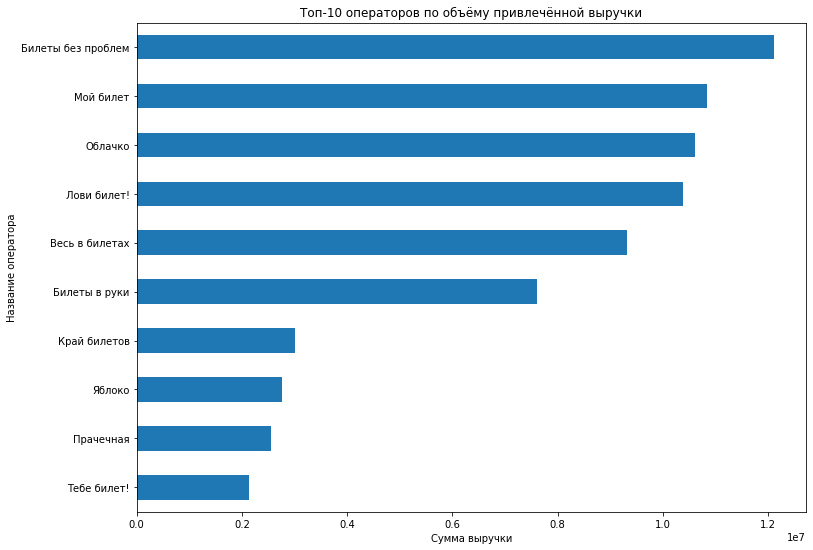

In [105]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))

 

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
top_revenue_service['total_revenue'].sort_values().tail(10).plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Топ-10 операторов по объёму привлечённой выручки'
)

# Настраиваем оформление графика
plt.xlabel('Сумма выручки')
plt.ylabel('Название оператора')


# Выводим график
plt.show()

Таким образом, наибольшее разнообразие мероприятий предлагается в `Каменевском регионе`, на который приходится `24,6%` всех событий, в то время как идущую за ней `Североярская область` - `16,5%`. На `Широковская область` и` Светополянский округ` приходится `5,06%` и `4,8%` соответственно. Похожая стиуация наблюдается в распределении доли заказов среди регионов - на `Каменевский регион` приходится `27,7%` всех заказов, на идущую за ней `Североярская область` - `12,3%`. На `Широковскую область` и `Медовскую область` приходится `7,14%` и `5,17%` соответственно.

При анализе билетных операторов было выявлено, что наибольшей долей уникальных мероприятий обладает оператор `Лови билет!` - `20,9%`. Далее следуют `Билеты без проблем` и Билеты в руки с `16,5%` и `14,3%` соответственно. Для остальных операторов доля меньше 9%. Лидирующую позицию по доле заказов занимает `Билеты без проблем` с  `19,21%`. Далее следуют `Лови билет!` - `15,3%` и `Билеты в руки` - `15,26%`. По доле выручки на первом месте находится оператор `Билеты без проблем` - `14,82%`, за которым c небольшим отставанием следует `Мой билет`	- `13,25%` и `Облачко` - `13%`.

### Промежуточный вывод

Анализируя осеннюю динамику основных показателей, было выявлено, что для показателей `общего числа заказов` и `количества активных пользователей` наблюдается положительная динамика, при этом в начале сентября, начале октября и конце октября были зафиксированы разовые резкие увеличения количества заказов. Аналогичная динамика наблюдается для `среднего числа заказов на одного пользователя`  с существенными увеличениями показателя в начале сентября, начале октября и конце октября. Динамика `средней стоимости одного билета` абсолютно противоположна динамике общего числа заказов - существенные спады в динамике показателя зафиксированы в начале сентября, начале октября и конце октября.  Анализируя динамику о пользовательской активности по дням недели, можно отметить, что наибольшее число уникальных пользователей и общее число заказов было зафиксировано в середине недели, главным образом во вторник и четверг. При этом на выходных активность пользователей заметно снижалась.

Наибольшее разнообразие мероприятий предлагается в `Каменевском регионе`, а также в `Североярской области`, за которыми следует `Широковская область` и` Светополянский округ`. Похожая ситуация наблюдается в распредлении доли заказов среди регионов - примено треть всех заказов приходится на `Каменевский регион`,за котроыми следует  `Североярская область`. Далее с существенным отставанием следуют `Широковская область` и `Медовскую область`. При анализе билетных операторов было выявлено, что наибольшей долей уникальных мероприятий обладает оператор `Лови билет!` - `20,9%`. Далее следуют `Билеты без проблем` и Билеты в руки с `16,5%` и `14,3%` соответственно. Для остальных операторов доля меньше 9%. Лидирующую позицию по доле заказов занимает `Билеты без проблем` с  `19,21%`. Далее следуют `Лови билет!` - `15,3%` и `Билеты в руки` - `15,26%`. По доле выручки на первом месте находится оператор `Билеты без проблем` - `14,82%`, за которым c небольшим отставанием следует `Мой билет`	- `13,25%` и `Облачко` - `13%`.

## 4. Статистический анализ данных

В данном разделе рассмотрим два предположения о большей активности пользователей мобильных устройств, а именно:

   - Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
   - Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
   
Обе гипотезы рассматриваются для данных за осенний период.

### 4.1 Среднее количестово заказов

Для оценки статистической значимости необходимо сформулировать нулевую и альтернативную гипотезы. В начале рассмотрим первое предположение о том, что  среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
Здесь в качестве целевой метрики рассматривается среднее количество заказов на одного пользователя. Сформулируем нулевую и альтернативную гипотезы.

    Нулевая гипотеза H₀: Среднее количество заказов на одного пользователя для мобильных устройств  не больше, чем среднее количество заказов на одного пользователя стационарных устройств.

    Альтернативная гипотеза H₁: Среднее количество заказов на одного пользователя для мобильных устройств больше, чем среднее количество заказов на одного пользователя стационарных устройств, и это различие статистически значимо.

Поскольку в качестве целевой метрики мы рассматриваем выборочное среднее двух групп,  в качестве статистического теста будет использован t-тест Уэлча.

Одним из требований к тесту выступает нормальность выборочного среднего, которая достигается при наличии более 1000 наблюдений. Чтобы это проверить выведем количество доступных нам наблюдений. Для этого для начала сгруппируем заказы по типу устрйотсва и пользователям.

In [106]:
# Сгруппируем заказы по типу устройства и пользователям
orders_per_user = afisha_df[afisha_df['season']=='Осень'].groupby(['device_type_canonical','user_id'])['order_id'].nunique().reset_index()
orders_per_user

,device_type_canonical,user_id,order_id
0,desktop,0028d17a676f8c8,1
1,desktop,002b75ca606ba46,3
2,desktop,002ec276eee9b0b,1
3,desktop,0040e12d70fae81,1
4,desktop,005fefeabf1e678,3
...,...,...,...
19051,mobile,ffe73c50cbd71fc,2
19052,mobile,ffed3ff067d4f12,3
19053,mobile,fff13b79bd47d7c,3
19054,mobile,fffcd3dde79eb2c,14


Далее выведем получившиеся количество пользователей на обе группы.

In [107]:
# Выведем получившиеся количество пользователей на обе группы
len(orders_per_user)

19056

Всего получилось 19056 наблюдений, что достаточно для выполнения предпосылки о нормальности распределения выборочного среднего.

Также одной из предпосылок использования Т-теста является независимость наблюдений. Для этого необходимо исключить пользователей, входящих в обе группы. Для начала рассмотрим, сколько пользователей входят в каждую группу до преобразований.

In [108]:
# Выведем количество пользователей для обеих групп
display(orders_per_user[orders_per_user['device_type_canonical'] == 'desktop']['user_id'].nunique(), 
        orders_per_user[orders_per_user['device_type_canonical'] == 'mobile']['user_id'].nunique())

4868

14188

Далее выведем количество пользователей, попавших в обе группы.

In [109]:
# Выведем id пользователей для обеих групп
users_desktop = orders_per_user[orders_per_user['device_type_canonical'] == 'desktop']['user_id']
users_mobile = orders_per_user[orders_per_user['device_type_canonical'] == 'mobile']['user_id']

# Проведём проверку групп на пересечение
intersection = list(set(users_desktop) & set(users_mobile))
print(len(intersection)) 

3248


Всего в обе группы попали 3248 пользователей. Удалим их из обеих групп и выведем количество пользователей для каждой группы.

In [110]:
# Удаляем пересечения
orders_per_user_without_inters = orders_per_user[~orders_per_user['user_id'].isin(intersection)]

# Выведем количество уникальных пользователей в каждой из экспериментальных групп
display(orders_per_user_without_inters[orders_per_user_without_inters['device_type_canonical'] == 'desktop']['user_id'].nunique(), 
        orders_per_user_without_inters[orders_per_user_without_inters['device_type_canonical'] == 'mobile']['user_id'].nunique())
display((len(orders_per_user_without_inters) - len(orders_per_user))/(len(orders_per_user))*100)

1620

10940

-34.089000839630565

В результате преобразований общий объём выборки сократился на 34%.

Далее рассмотрим количество заказов на каждого пользователя на выбросы с помощью диаграммы размаха.

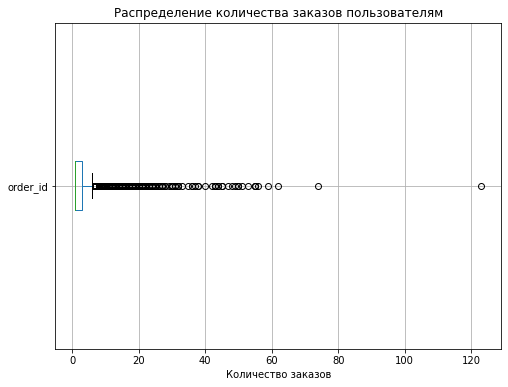

In [111]:
boxplot = orders_per_user_without_inters.boxplot(column='order_id',
                     vert=False, 
                     figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение количества заказов пользователям')
boxplot.set_xlabel('Количество заказов')

plt.show()

Из диаграммы размаха видно, что имеются значительное количество выбросов. В связи с чем для более достоверных результатов анализа, отберём значения по 99-му процентилю и построим обновлённый вариант диаграммы размаха.

In [112]:
# Отберём значения с количеством заказов по 99-му процентилю
orders_per_user_without_inters_99 = orders_per_user_without_inters[orders_per_user_without_inters['order_id'] <= orders_per_user_without_inters['order_id'].quantile(0.99)]

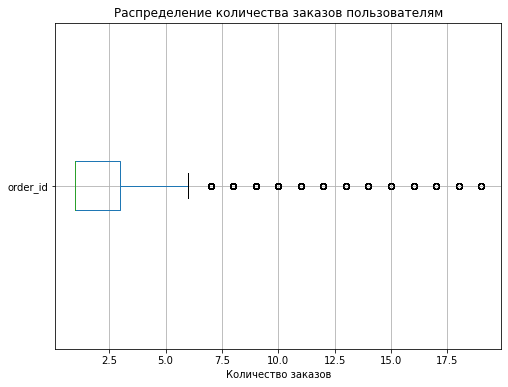

In [113]:
boxplot = orders_per_user_without_inters_99.boxplot(column='order_id',
                     vert=False, 
                     figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение количества заказов пользователям')
boxplot.set_xlabel('Количество заказов')

plt.show()

Из диаграммы видно, что количество выбросов заметно сократилось. Выведем насколько сократился объём выборки.

In [114]:
# Выведем насколько сократился объём выборки
display((len(orders_per_user_without_inters_99) - len(orders_per_user_without_inters))/(len(orders_per_user_without_inters))*100)

-0.9554140127388535

Выведем количество для каждой анализируемой группы после всех преобразований.

In [115]:
# Выведем количество для каждой анализируемой группы после всех преобразований.
display(orders_per_user_without_inters_99[orders_per_user_without_inters_99['device_type_canonical'] == 'desktop']['user_id'].nunique(), 
        orders_per_user_without_inters_99[orders_per_user_without_inters_99['device_type_canonical'] == 'mobile']['user_id'].nunique())

1611

10829

Как видно, количество пользователей стационарных устройств существенно сократилась.

Далее сделаем предварительный общий вывод о том, больше ли среднее количество заказов на одного пользователя мобильного приложения по сравнению с пользователями стационарных устройств.

In [116]:
# Присвоим последнему датафрйему исходное название
orders_per_user = orders_per_user_without_inters_99

# Выведем среднее количество заказов на одного пользователя в разрезе типа устройства
orders_per_user.groupby('device_type_canonical')['order_id'].mean()

device_type_canonical
desktop    1.797641
mobile     2.576230
Name: order_id, dtype: float64

Как видно из вызрузки, среднее количество заказов для пользователей мобильных устройств выше, чем у пользователей стационарных устройств. Далее проведём статистичесикй тест, чтобы узнать является ли разница между средними значенями выборками статистически значимой.

In [117]:
metric_b = orders_per_user[orders_per_user['device_type_canonical']=='mobile']['order_id'] ## выборка целевой метрики для пользователей мобильных устройств
metric_a = orders_per_user[orders_per_user['device_type_canonical']=='desktop']['order_id'] ## выборка целевой метрики для пользователей стационарных устройств

alpha = 0.05 ## на каком уровне значимости проверяем гипотезу о равенстве выборочных средних

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    metric_b, 
    metric_a, 
    equal_var=False,
    alternative='greater') 

In [118]:
if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча = {p_value_welch_ttest}')
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в обеих группах равны')
    print('Интерпретация: Среднее количество заказов на одного пользователя мобильное приложения равно среднему количеству заказов на одного пользователя стационарных устройств')
else:
    print(f'p-value теста Уэлча = {p_value_welch_ttest}')
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах не равны, и в группе B больше')
    print('Интерпретация: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств')

p-value теста Уэлча = 1.6070145192423936e-53
Нулевая гипотеза не находит подтверждения! Выборочные средние в группах не равны, и в группе B больше
Интерпретация: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств


Таким образом, предположение о том, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, между двумя группами имеются разница, которая статистически значима.

### 4.2 Среднее время между заказами

Далее проверим предположение о том, что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств. 
В качестве целевой метрики выступает среднее время между заказами. Сформулируем нулевую и альтернативную гипотезы: 

    Нулевая гипотеза H₀: Среднее время между заказами  для мобильных устройств не больше, чем среднее время между заказами стационарных устройств.

    Альтернативная гипотеза H₁: Среднее время между заказами  для мобильных устройств больше, чем среднее время между заказами стационарных устройств, и это различие статистически значимо.

Поскольку в качестве целевой метрики мы рассматриваем выборочное среднее двух групп, то как и в предыдущем случае, в качестве статистического теста будет использован t-тест Уэлча.

Для этого необходимо исключить пользователей, использующих оба типа устройств.  Для начала рассмотрим сколько было сделано заказов с каждого типа устройства до преобразований.

In [119]:
# Выведем количество наблюдений для каждой группы
display(afisha_df[afisha_df['device_type_canonical'] == 'desktop']['order_id'].count(), 
        afisha_df[afisha_df['device_type_canonical'] == 'mobile']['order_id'].count())

57269

230230

Далее исключим записи для пользователей, использующих оба тип устройства,  и выведем оставшиеся количество записей.

In [120]:
# Исключаем пересечения
days_since_without_inters = afisha_df[~afisha_df['user_id'].isin(intersection)]

# Выведем оставшиеся количество записей
display(days_since_without_inters[days_since_without_inters['device_type_canonical'] == 'desktop']['order_id'].count(), 
        days_since_without_inters[days_since_without_inters['device_type_canonical'] == 'mobile']['order_id'].count())

8044

54701

Выведем насколько сократился общий размер выборки

In [121]:
# Выведем насколько сократился объём выборки
display((len(days_since_without_inters) - len(afisha_df))/(len(afisha_df))*100)

-78.17557626287396

В результате исключения пользователей, входящих в обе группы, размер выборки сократился на 78,2%.

Далее рассмотрим выборку на выбросы и аномалии. Для этого используем диаграмму размаха.

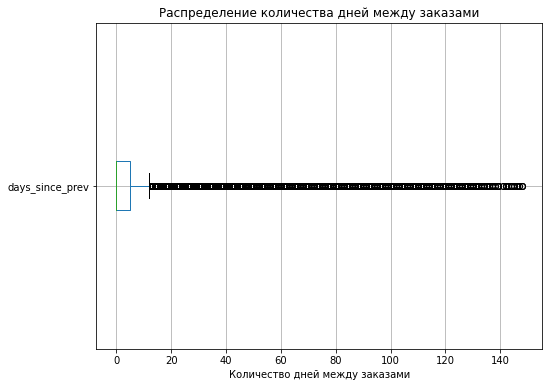

In [122]:
boxplot = days_since_without_inters.boxplot(column='days_since_prev',
                     vert=False, 
                     figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение количества дней между заказами')
boxplot.set_xlabel('Количество дней между заказами')

plt.show()

Из диаграммы видно, что имеются значительные выбросы, в связи с чем отберём данные по 95 процентилю и выведем обновлённый вариант диаграммы.

In [123]:
# Отберём данные по 95 процентилю
days_since_without_inters_95 = days_since_without_inters[days_since_without_inters['days_since_prev'] <= days_since_without_inters['days_since_prev'].quantile(0.95)]


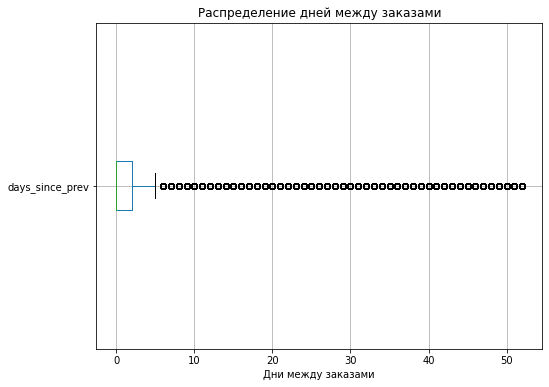

In [124]:
boxplot = days_since_without_inters_95.boxplot(column='days_since_prev',
                     vert=False, 
                     figsize=(8, 6))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение дней между заказами')
boxplot.set_xlabel('Дни между заказами')

plt.show()

Из диаграммы видно, что количество выбросов заметно снизилось. Далее рассчитаем насколько сократился размер выборки.

In [125]:
# Рассчитаем насколько сократился размер выборки
display((len(days_since_without_inters_95) - len(days_since_without_inters))/(len(days_since_without_inters))*100)

-4.880070125109571

Размер выборки сократился на 4,9%. Выведем количество наблюдений для обеих групп.

In [126]:
# Переименуем датафрйем
days_since_df = days_since_without_inters_95

# Выведем количество наблюдений для обеих групп
display(days_since_df[days_since_df['device_type_canonical'] == 'desktop']['order_id'].count(), 
        days_since_df[days_since_df['device_type_canonical'] == 'mobile']['order_id'].count())

7636

52047

Далее предварительно рассмотрим средние значения дней между заказами для различных типов устройств.

In [127]:
# Рассмотрим средние значения дней между заказами для различных типов устройств
days_since_df.groupby('device_type_canonical')['days_since_prev'].mean()

device_type_canonical
desktop    3.354112
mobile     4.572290
Name: days_since_prev, dtype: float64

Как видно из выгрузки, среднее количество дней между заказами для пользователей мобильных устройств выше, чем у пользователей стационарных устройств. Далее проведём статистический тест, чтобы узнать является ли разница между средними значениями выборками статистически значимой.

In [128]:
metric_b = days_since_df[days_since_df['device_type_canonical']=='mobile']['days_since_prev'] ## выборка целевой метрики для пользователей мобильных устройств
metric_a = days_since_df[days_since_df['device_type_canonical']=='desktop']['days_since_prev'] ## выборка целевой метрики для пользователей стационарных устройств

alpha = 0.05 ## на каком уровне значимости проверяем гипотезу о равенстве выборочных средних

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    metric_b, 
    metric_a, 
    equal_var=False,
    alternative='greater')
if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча = {p_value_welch_ttest}')
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в обеих группах равны')
    print('Интерпретация: Среднее количество дней между заказами для пользователей мобильного приложения равно среднему количеству дней между заказами для пользователей стационарных устройств')
else:
    print(f'p-value теста Уэлча = {p_value_welch_ttest}')
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах не равны, и в группе B больше')
    print('Интерпретация: Среднее количество дней между заказами для пользователей мобильного приложения больше среднего количества дней между заказами для пользователей стационарных устройств')

p-value теста Уэлча = 5.5816881635293244e-27
Нулевая гипотеза не находит подтверждения! Выборочные средние в группах не равны, и в группе B больше
Интерпретация: Среднее количество дней между заказами для пользователей мобильного приложения больше среднего количества дней между заказами для пользователей стационарных устройств


In [129]:
days_since_df = days_since_df[days_since_df['days_since_prev'] > 0]
metric_b = days_since_df[days_since_df['device_type_canonical']=='mobile']['days_since_prev'] ## выборка целевой метрики для пользователей мобильных устройств
metric_a = days_since_df[days_since_df['device_type_canonical']=='desktop']['days_since_prev'] ## выборка целевой метрики для пользователей стационарных устройств

alpha = 0.05 ## на каком уровне значимости проверяем гипотезу о равенстве выборочных средних

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    metric_b, 
    metric_a, 
    equal_var=False,
    alternative='greater')
if p_value_welch_ttest>alpha:
    print(f'p-value теста Уэлча = {p_value_welch_ttest}')
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в обеих группах равны')
    print('Интерпретация: Среднее количество дней между заказами для пользователей мобильного приложения равно среднему количеству дней между заказами для пользователей стационарных устройств')
else:
    print(f'p-value теста Уэлча = {p_value_welch_ttest}')
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах не равны, и в группе B больше')
    print('Интерпретация: Среднее количество дней между заказами для пользователей мобильного приложения больше среднего количества дней между заказами для пользователей стационарных устройств')

p-value теста Уэлча = 0.9999997291176743
Нулевая гипотеза находит подтверждение! Выборочные средние в обеих группах равны
Интерпретация: Среднее количество дней между заказами для пользователей мобильного приложения равно среднему количеству дней между заказами для пользователей стационарных устройств


Таким образом, предположение о том, что среднее количество дней между заказами для пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств, между двумя группами имеются разница, которая статистически значима.

### Промежуточный вывод

В данном разделе была проанализирована активность пользователей, использующих мобильные устройства, по сравнению с пользователями, использующими стационарные устройства, были проверены две гипотезы о среднем количестве заказов и дней между заказами для обеих групп. Т.к. в качестве целевой метрики рассматривалось выборочное среднее двух групп,  в качестве статистического теста был использован t-тест Уэлча. По итогам статистического анализа было выявлено, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, между двумя группами имеются разница, которая статистически значима. Также по итогам проверки второй гипотезы было установлено, что среднее количество дней между заказами для пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств, разница между группами также статистически значима.

## 5. Общий вывод и рекомендации

В ходе данного проекта были проанализированы данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. Работа осуществлялась на основе трёх датасетов:
   - final_tickets_orders_df.csv, содержащий информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных;
   - final_tickets_events_df.csv, содержащий информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия
   - final_tickets_tenge_df.csv, содержащий информацию о курсе тенге к российскому рублю за 2024 год.

В ходе проведённого анализа было выявлено, что наиболее востребованными мероприятиями являются  мероприятия, относящиеся к категориям  `концерты`, `другое` и `выставки`, наимене выстребованными оказались категории `ёлки` и `выставки`. C наступлением осени по все категориям мероприятий наблюдался рост количества заказов. Наибольший рост зафиксирован для событий, относящихся к категориям `спорт`,`ёлки`,`театр`. Также рост числа заказов наблюдался для обоих типов устройств - `desktop` и `mobile`. Вместе с этим увеличилось число заказов для мероприятий всех возрастных категорий кроме `18+`. Средняя выручка с одного билета снизилась для событий категорий `другое`,`концерты`,`спорт`,`театр`, `ёлки` и напротив увеличилась для категорий  `стендап` и `выставки`. 
Анализируя осеннюю динамику основных показателей, было выявлено, что для показателей общего числа заказов и количества активных пользователей наблюдается положительная динамика, при этом в начале сентября, начале октября и конце октября были зафиксированы разовые резкие увеличения количества заказов. Аналогичная динамика наблюдается для среднего числа заказов на одного пользователя. Динамика средней стоимости одного билета абсолютно противоположна динамике общего числа заказов - существенные спады в динамике показателя зафиксированы в начале сентября, начале октября и конце октября. Анализируя динамику о пользовательской активности по дням недели, можно отметить, что наибольшее число уникальных пользователей и общее число заказов было зафиксировано в середине недели. При этом на выходных активность пользователей заметно снижалась.
Наибольшее разнообразие мероприятий предлагается в `Каменевском регионе`, а также в `Североярской области`, за которыми следует `Широковская область` и `Светополянский окру`г. Похожая ситуация наблюдается в распредлении доли заказов среди регионов - примено треть всех заказов приходится на `Каменевский регион`,за котроыми следует `Североярская область`. Далее с существенным отставанием следуют `Широковская область` и `Медовская область`. При анализе билетных операторов было выявлено, что наибольшей долей уникальных мероприятий обладает операторы `Лови билет!`, `Билеты без проблем`, `Билеты в руки`. Лидирующую позицию по доле заказов занимает `Билеты без проблем`, далее следуют `Лови билет!` и `Билеты в руки`.

По итогам статистического анализа было выявлено, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, а также, что  среднее количество дней между заказами для пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств. В обоих случаях между двумя группами существует разница, которая статистически  значима. В результате чего можно заключить, что пользователи, использующие мобильные устройства, являются более активными.

В качестве рекомендаций можно указать, что в связи с явно более низким уровнем спроса в летние месяцы, стоит рассмотреть те или иные маркетинговые инструменты (например, таргетированная реклама на целевую аудиторию или дополнительное взаимодействие с организаторами и площадками), на основе которых можно нивелировать сезонные колебания. Похожие инструменты можно рассмотреть для увеличения спроса в выходные дни, когда количество заказов существенно снижается. Также стоит обратить внимание больший разрыв между лидирующими регионами и остальными по количеству мероприятий и заказов.